<h2>Снижение размерности пространства</h2>

Визуализация данных помогает понять их структуру и, как следствие, подсказывает методы анализа этих данных. Однако отображение многомерных данных на плоскости упирается в слишком большое количество измерений. Следовательно, встает задача отображения большого числа измерений на плоскость.<br>
Один из методов такого отображения состоит в том, что мы преобразуем пространство в новое, имеющее меньшую размерность. Например, <a href="https://habr.com/post/304214/">метод главных компонент</a> (<i>PCA, Principle Component Analysis, <a href="http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html"> документация</a></i>) находит новую ось, которая направлена вдоль направления наибольшей дисперсии наших точек. Далее строится проекция всех точек на эту ось. Таким образом получаетсяя первая координата в новом пространстве. Это направление отбрасывается, после чего можно снова попытаться найти еще одну ось, еще одну и т.д. Операцию можно повторить необходимое количество раз.<br>
Импортируем библиотеки, необходимые для такого преобразования, а также для отображения полученного пространства. Строка <i>%matplotlib notebook</i> позволяет добавить интерактивности в отображение.

In [1]:
import numpy as np
from sklearn.decomposition import PCA

%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

По умолчанию PCA строит преставление пространства той же размерности, что и входные данные, однако сортирует измерения по "важности".<br>
При помощи функции fit_transform мы настраиваем коэффициенты преобразования (fit) и преобразуем переданные точки (transform). Каждое из этих действий для PCA можно производить по отдельности.<br>
Далее отобразим эти точки на плоскости при помощи библиотеки MatPlotLib.

Посмотрим как метод себя ведет на некоторых простых данных. Есть линия со случайными смещениями, к которой прибавлена относительно плоская область, идущая вдоль той же линии. Посмотрим на ее преобразования при помощи метода главных компонент.

In [2]:
np.random.seed(17)
pca_len=100

In [3]:
pca_coord=np.zeros((pca_len, 3))
pca_coord2=np.zeros((int(pca_len/2), 3))

pca_coord[:,0]=np.arange(pca_len)
pca_coord[:,1]=3*pca_coord[:,0]+np.random.normal(scale=3., size=(pca_len))
pca_coord[:,2]=5*pca_coord[:,0]+np.random.normal(scale=5., size=(pca_len))

pca_coord2[:,0]=np.arange(pca_len/4, 3*pca_len/4)
pca_coord2[:,1]=[3*x+(int(pca_len/2)-np.abs(x-int(pca_len/2)))*np.random.uniform(0, 5, 1) for x in pca_coord2[:,0]]
pca_coord2[:,2]=[5*x+(int(pca_len/2)-np.abs(x-int(pca_len/2)))*np.random.uniform(0, 1, 1) for x in pca_coord2[:,0]]

pca_coord=np.vstack((pca_coord, pca_coord2))

<IPython.core.display.Javascript object>


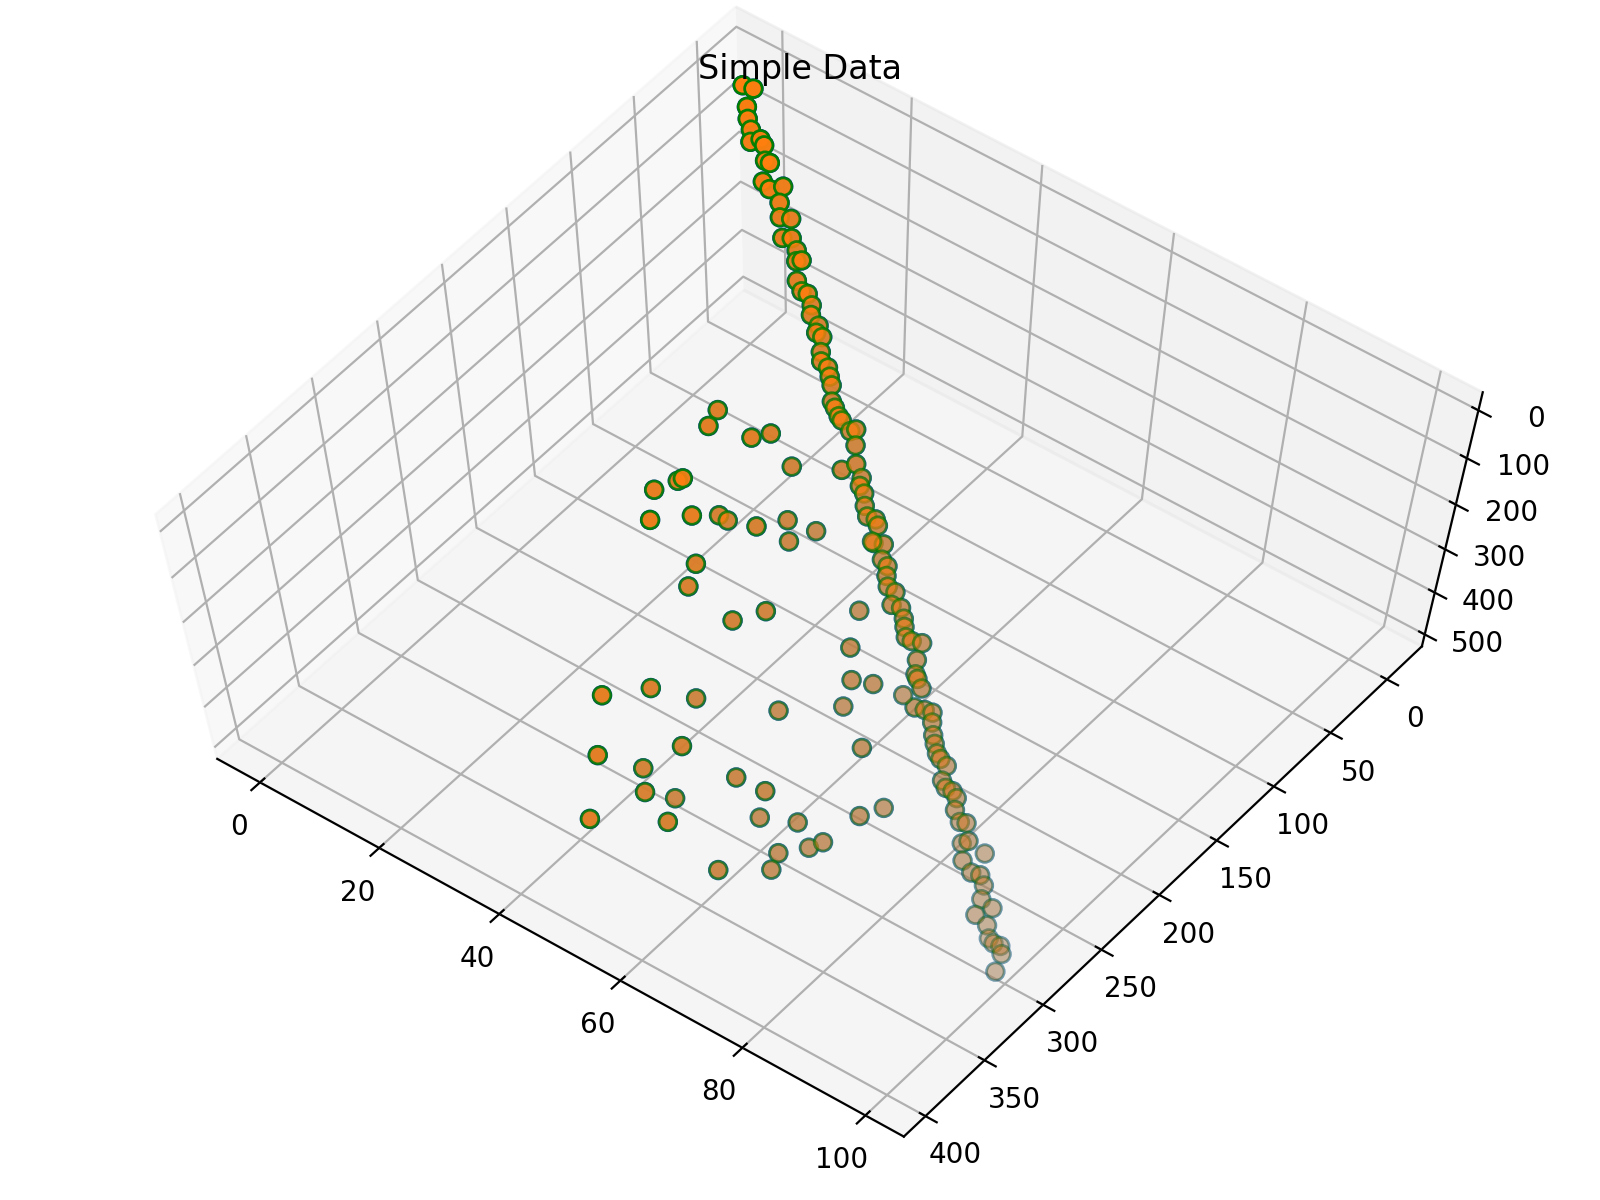

<IPython.core.display.Javascript object>


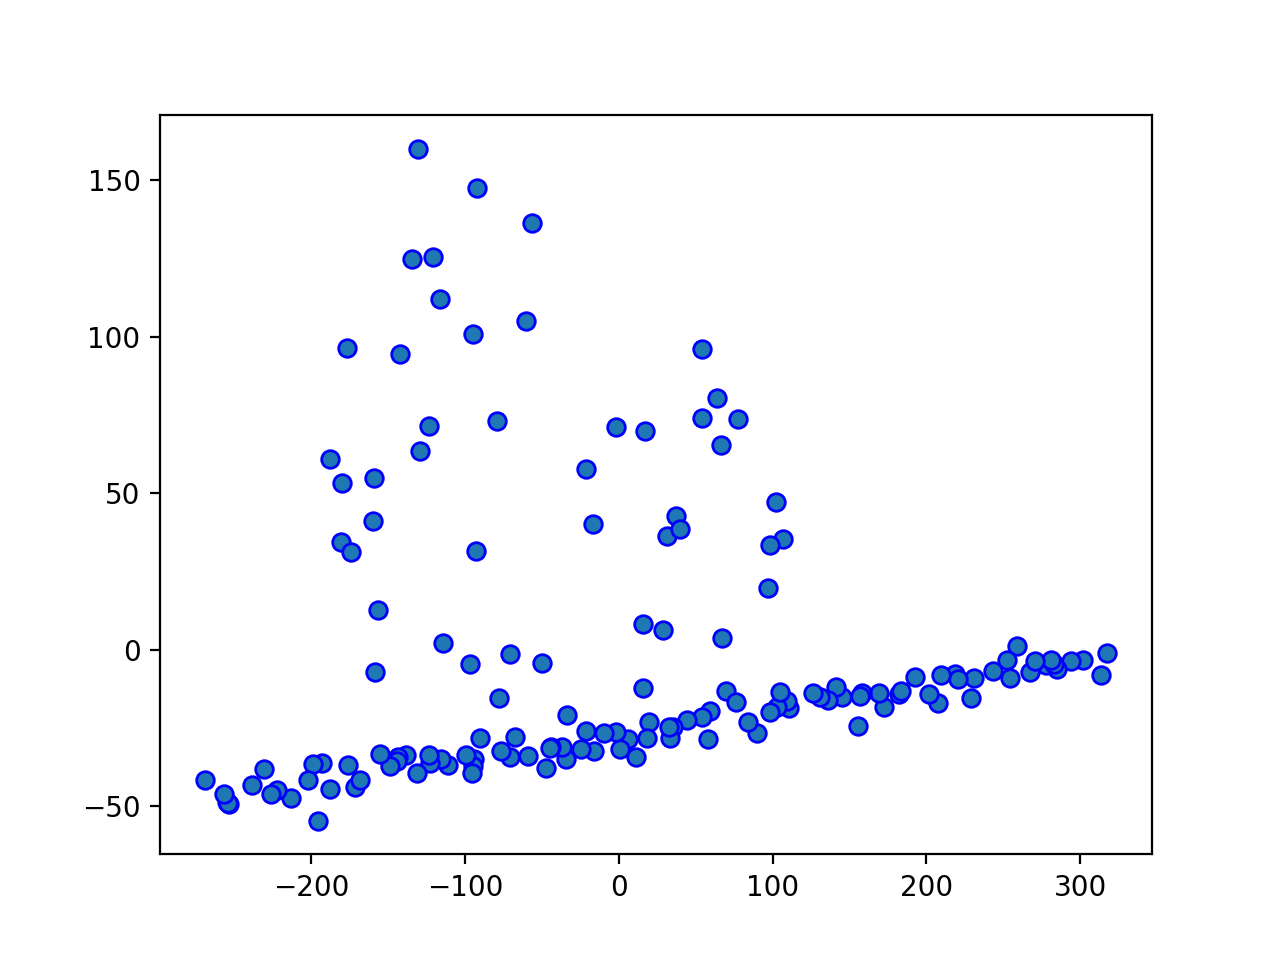

In [4]:
def plot_PCA(pca_coord):
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=60, azim=150)
    ax.scatter(pca_coord[:, 0], pca_coord[:, 1], pca_coord[:, 2], 
               cmap=plt.cm.Set1, edgecolor='b', s=40)
    ax.scatter(pca_coord[:, 0], pca_coord[:, 1], pca_coord[:, 2], 
               cmap=plt.cm.Set1, edgecolor='g', s=40)
    ax.set_title("Simple Data")

    plt.show()

    pca=PCA(n_components=2)
    show_reduced = pca.fit_transform(pca_coord)

    fig, ax = plt.subplots()
    ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
               cmap=plt.cm.autumn, edgecolor='b', s=40)
    plt.show()
    
plot_PCA(pca_coord)

Теперь развернем "плоские" данные.

<IPython.core.display.Javascript object>


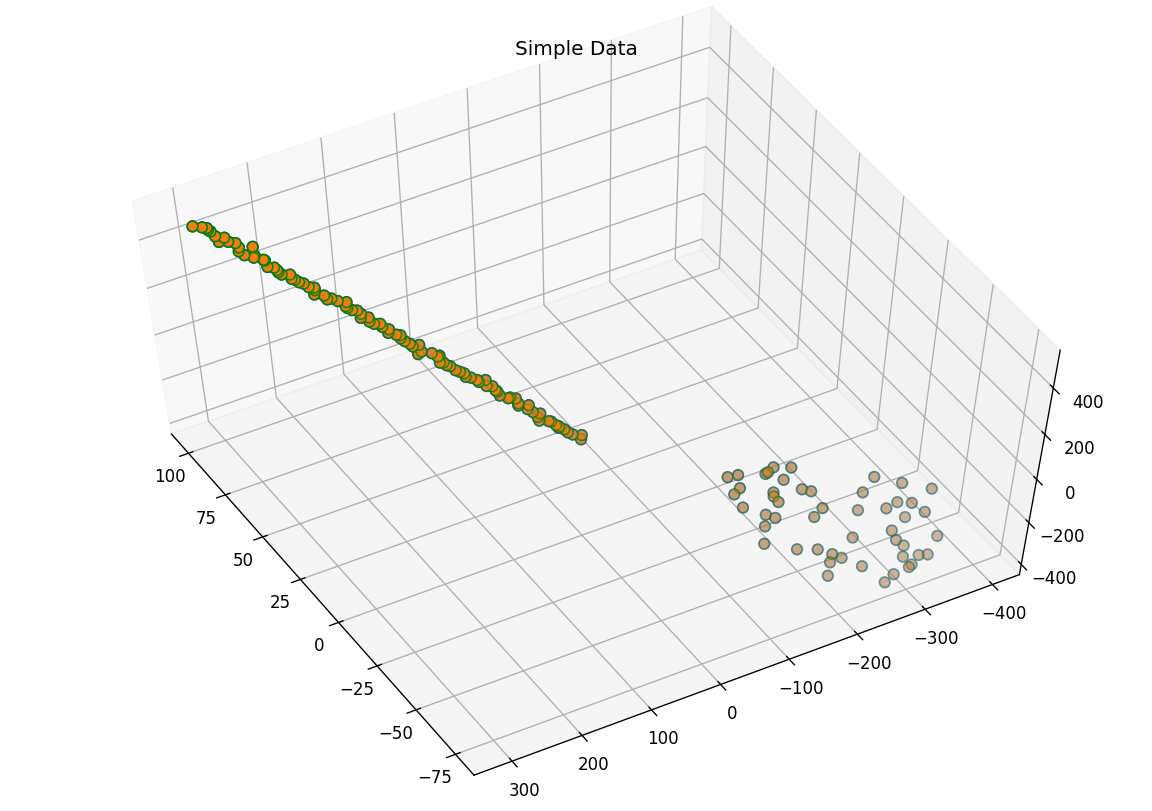

<IPython.core.display.Javascript object>


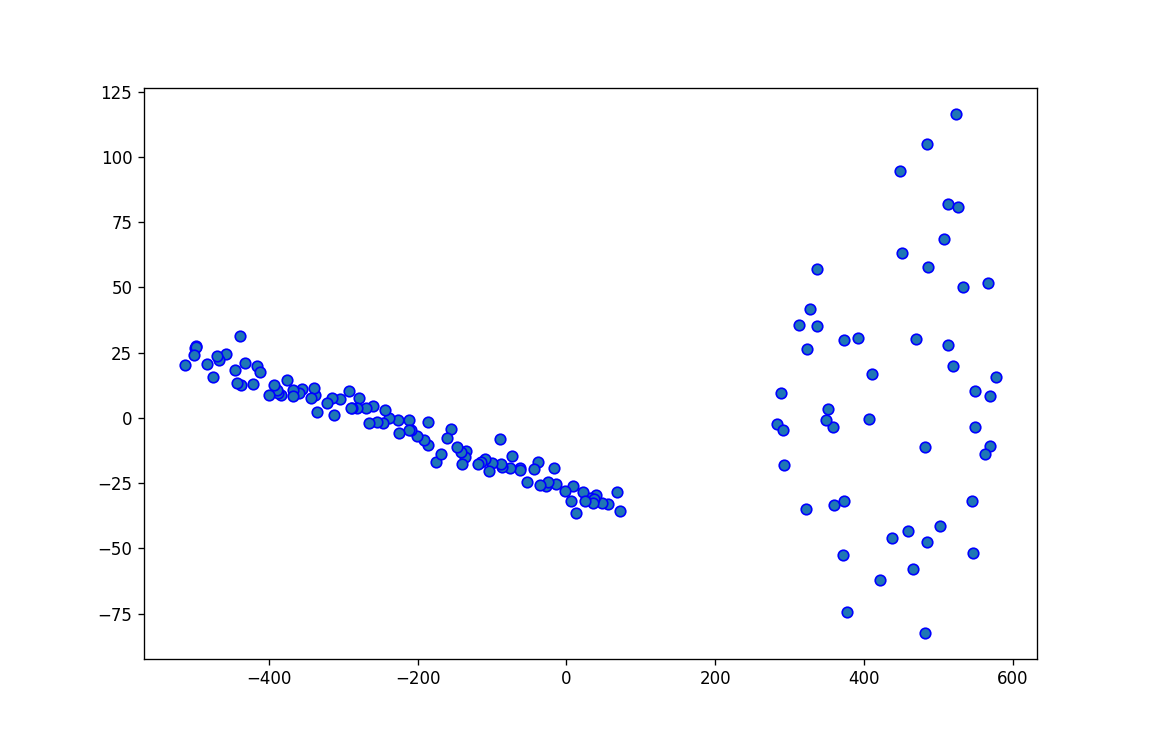

In [14]:
pca_coord3=np.vstack((pca_coord[:pca_len], -pca_coord2))
plot_PCA(pca_coord3)

Метод MDS (<i>Multidimensional Scaling</i>) поступает примерно по тому же принципу, но работает несколько быстрее и лучше. Однако в отличие от PCA он не умеет сохранять коэффициенты преобразования и использовать их для преобразования новых данных.

In [15]:
from sklearn.manifold import MDS

<IPython.core.display.Javascript object>


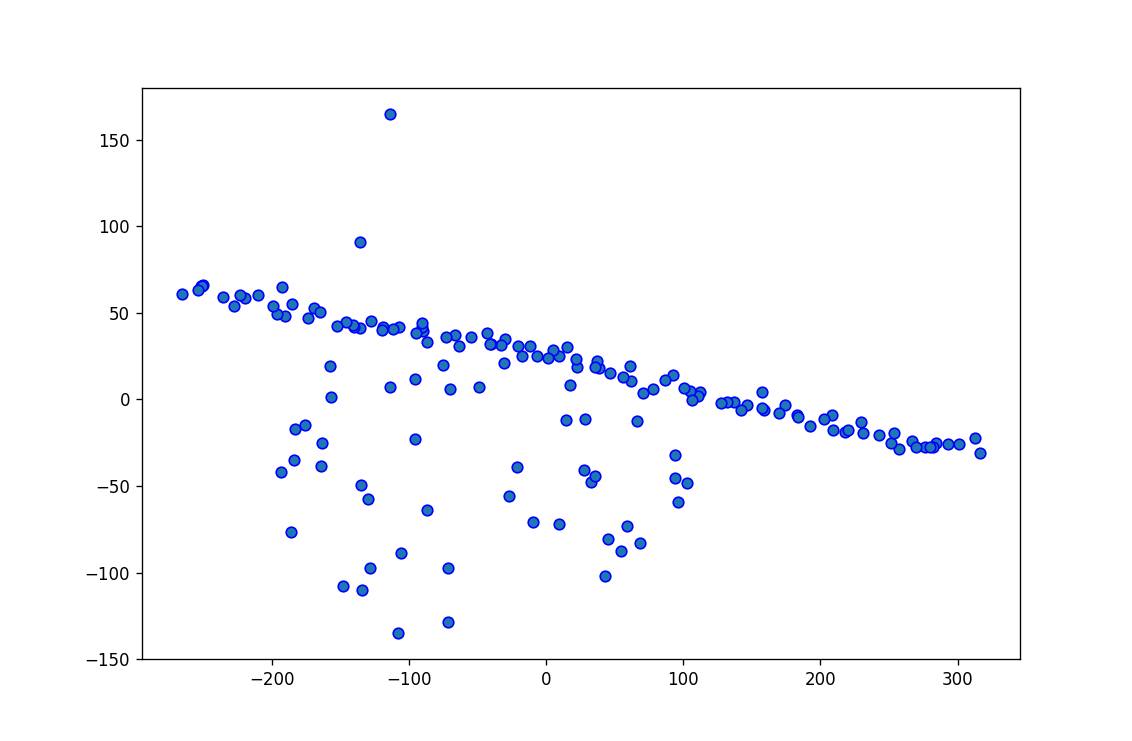

In [16]:
mds=MDS(random_state=1023)
show_reduced = mds.fit_transform(pca_coord)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

<IPython.core.display.Javascript object>


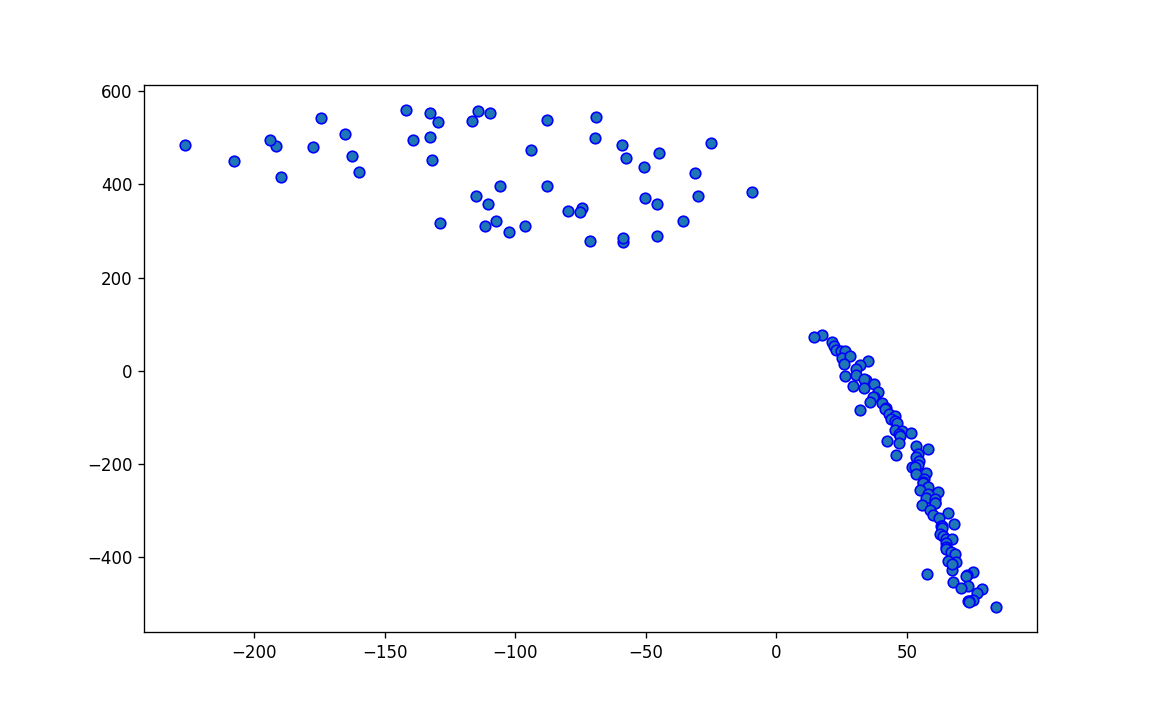

In [17]:
mds=MDS(random_state=1023)
show_reduced = mds.fit_transform(pca_coord3)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

Еще одним методом является t-SNE (<i>t-distributed stochastic neighbor embedding</i>). В отличие от предыдущих двух методов, он не строит проекции, а пытается "вдавить" точки в пространство заданной размерности, соблюдая при этом примерное расположение точек. Очевидно, полностью сохранить расположение получается не всегда, но алгоритм старается сделать так, чтобы соседние точки остались соседними.<br>
Как и MDS, t-SNE принципиально не умеет сохранять правила преобразования пространства, так что преобразовывать надо все точки сразу.

In [19]:
from sklearn.manifold import TSNE

<IPython.core.display.Javascript object>


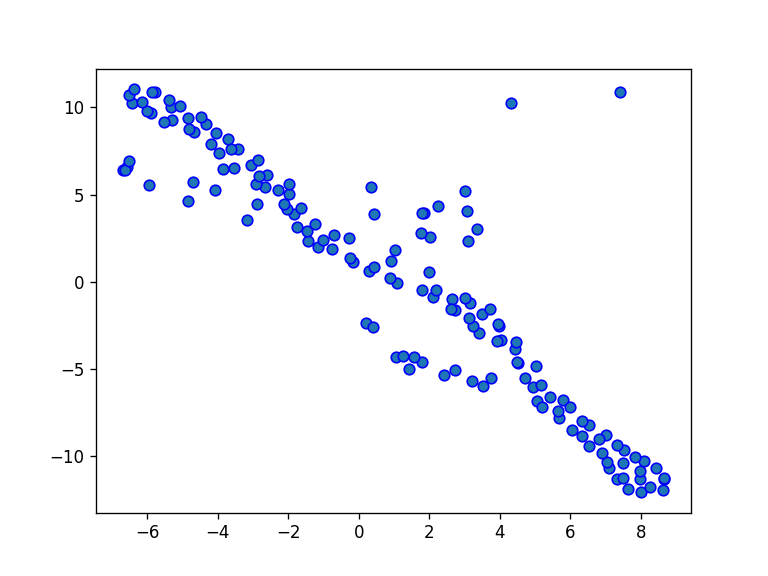

In [86]:
tsne=TSNE()
show_reduced = tsne.fit_transform(pca_coord)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()


Наконец, алгоритм, который появился в 2018 году - UMAP (<i>Uniform Manifold Approximation and Projection</i>). Принцип работы аналогичен t-SNE. Посмотрим и на его результаты.

In [19]:
import umap

<IPython.core.display.Javascript object>


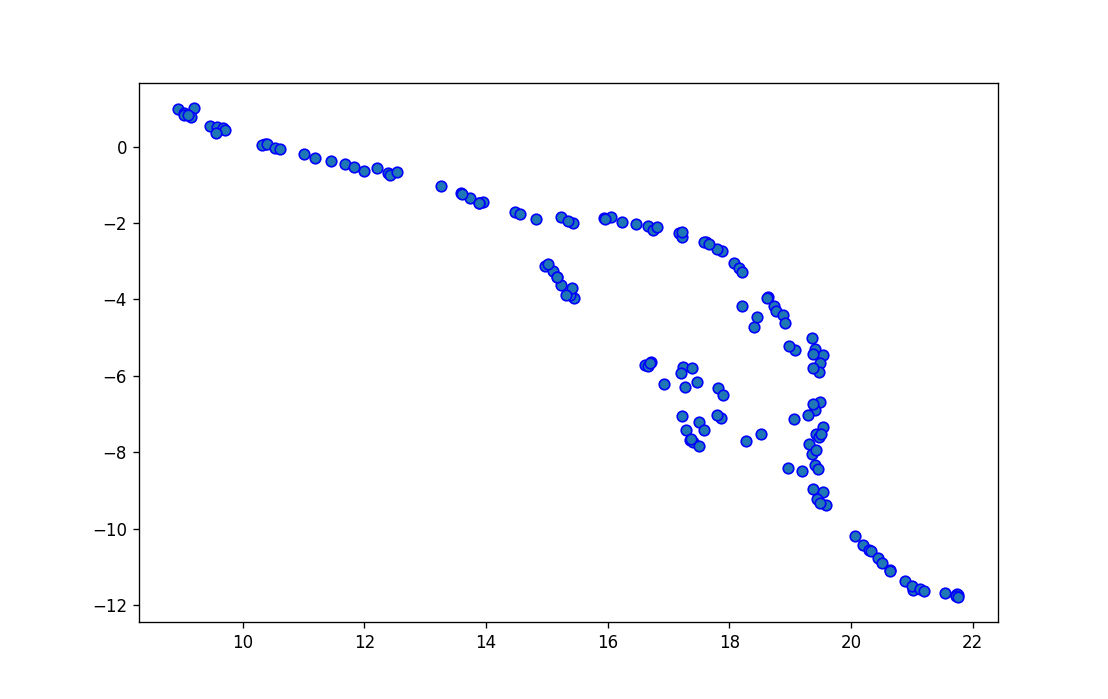

In [87]:
umap_emb = umap.UMAP()
show_reduced = umap_emb.fit_transform(pca_coord)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()


Теперь посмотрим что сделают эти преобразования с сеткой.

In [63]:
grid_coord=np.array(np.meshgrid(np.arange(10), np.arange(10), np.arange(10), np.arange(10))).T.reshape(-1,4)

<IPython.core.display.Javascript object>


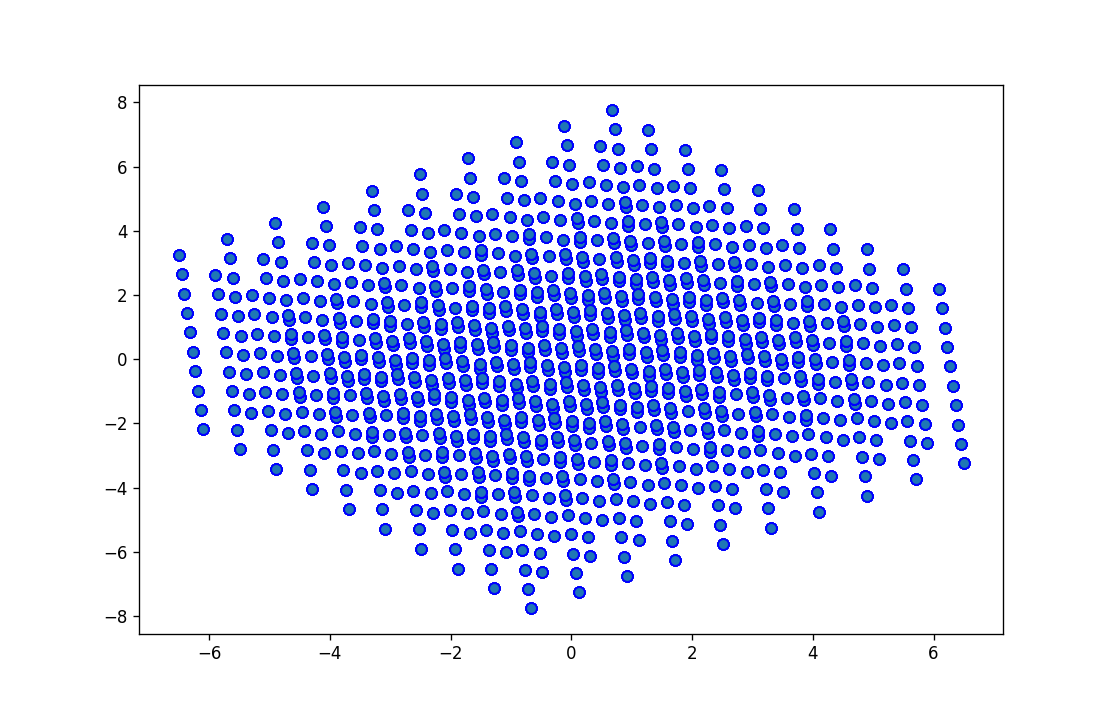

CPU times: user 189 ms, sys: 419 ms, total: 608 ms
Wall time: 95.2 ms


In [112]:
%%time
show_reduced = pca.fit_transform(grid_coord)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

<IPython.core.display.Javascript object>


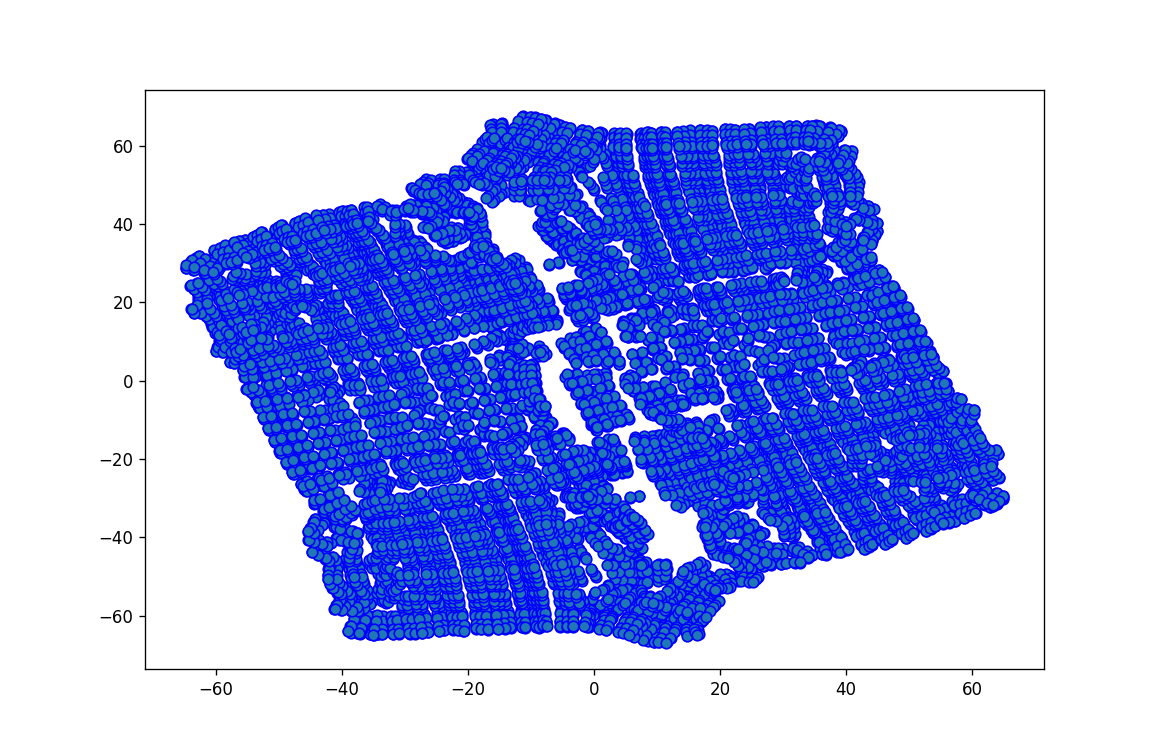

CPU times: user 2min 4s, sys: 17.1 s, total: 2min 21s
Wall time: 2min 21s


In [113]:
%%time
show_reduced = tsne.fit_transform(grid_coord)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

<IPython.core.display.Javascript object>


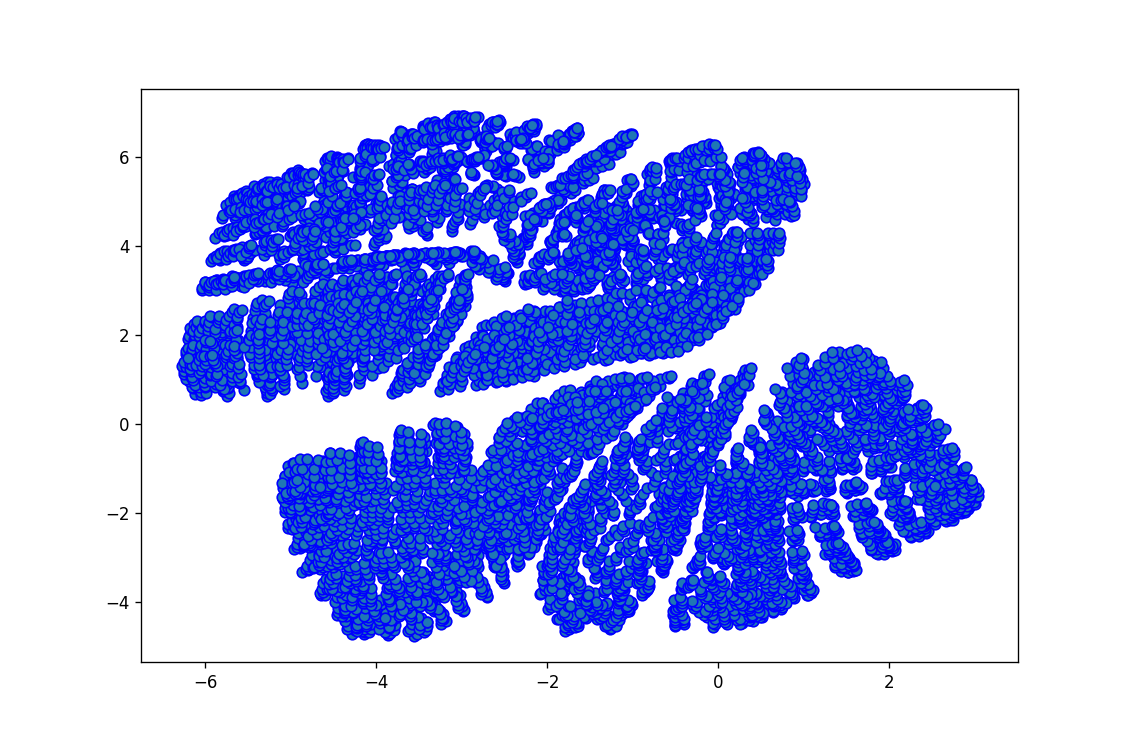

CPU times: user 33.9 s, sys: 2.68 s, total: 36.6 s
Wall time: 33.1 s


In [114]:
%%time
show_reduced = umap_emb.fit_transform(grid_coord)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

Теперь посмотрим на два непересекающихся кластера.

In [38]:
sph_coord=np.array([np.random.normal(scale=5., size=(1000))]).reshape(-1,4)
sph_coord=np.vstack((sph_coord, 50+np.array([np.random.normal(scale=5., size=(1000))]).reshape(-1,4)))

<IPython.core.display.Javascript object>


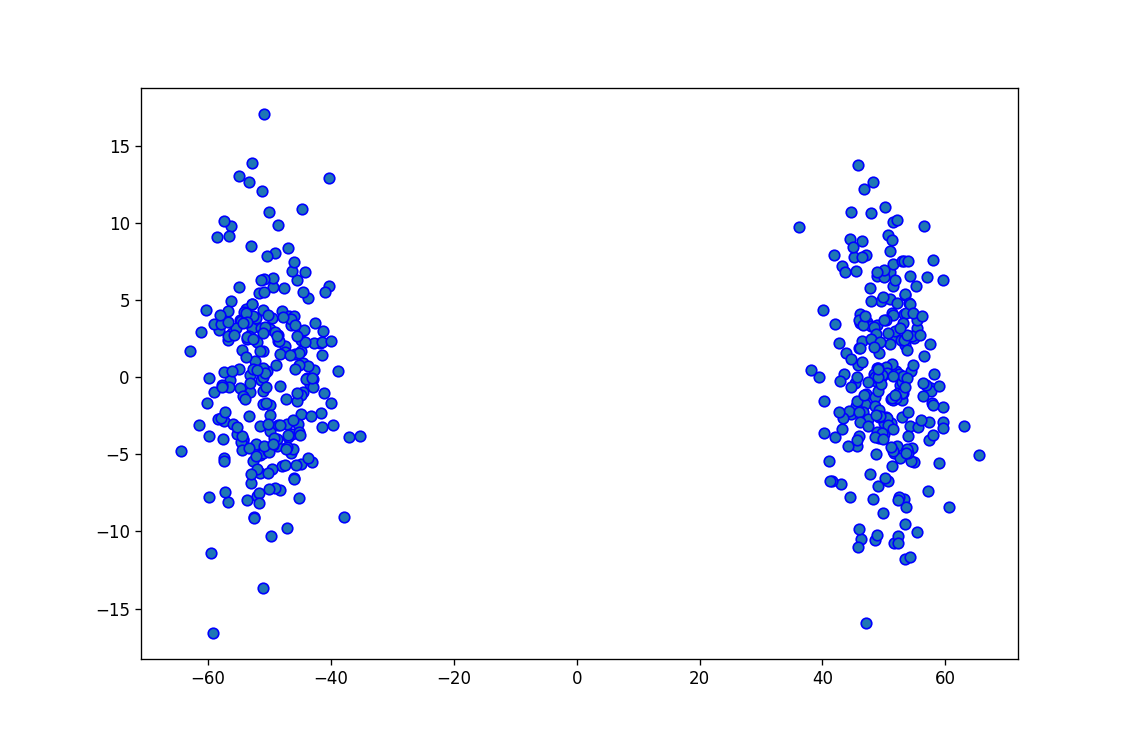

CPU times: user 31.1 ms, sys: 9.28 ms, total: 40.4 ms
Wall time: 29.2 ms


In [39]:
%%time
show_reduced = pca.fit_transform(sph_coord)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

<IPython.core.display.Javascript object>


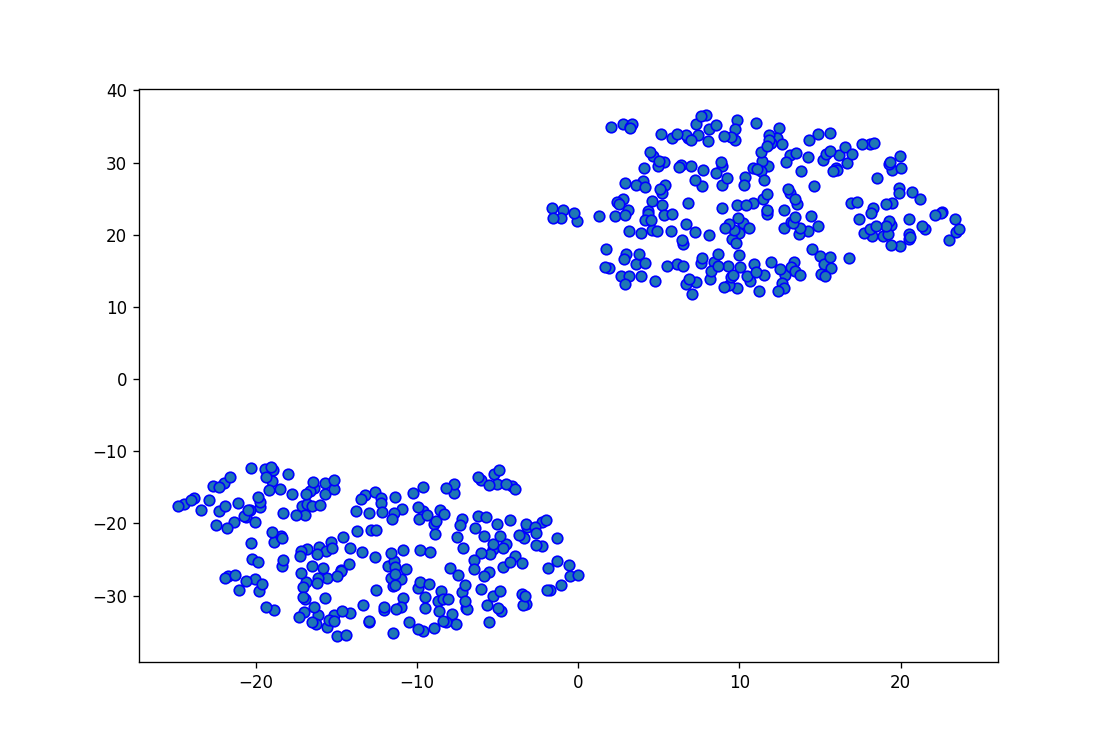

CPU times: user 5.94 s, sys: 831 ms, total: 6.77 s
Wall time: 6.84 s


In [40]:
%%time
show_reduced = tsne.fit_transform(sph_coord)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding 2 connected components using meta-embedding (experimental)
  n_components


<IPython.core.display.Javascript object>


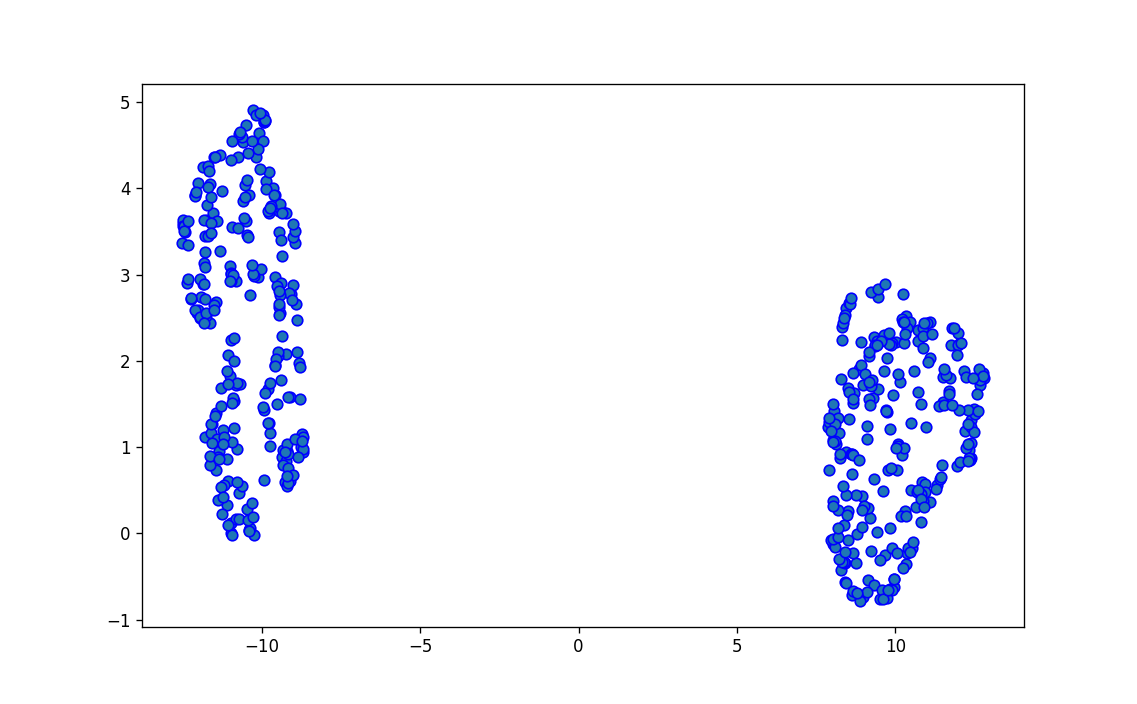

CPU times: user 1.48 s, sys: 495 ms, total: 1.97 s
Wall time: 1.28 s


In [41]:
%%time
show_reduced = umap_emb.fit_transform(sph_coord)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

А теперь посмотрим как выглядят на плоскости пассажиры "Титаника".<br>
Подробно о том как можно анализировать этот набор данных - <a href="https://habr.com/post/202090/">здесь</a>.

In [28]:
import pandas as pd

In [310]:
titanic_data2=pd.read_csv("titanic.csv")

In [311]:
titanic_data2=titanic_data2.replace({'Sex': 'male'}, 0)
titanic_data2=titanic_data2.replace({'Sex': 'female'}, 1)
titanic_data2=titanic_data2.replace({'Embarked': 'S'}, 0)
titanic_data2=titanic_data2.replace({'Embarked': 'C'}, 1)
titanic_data2=titanic_data2.replace({'Embarked': 'Q'}, 2)
# Для некоторых пассажиров возраст не указан. Заменяем его на медиану или нормальное распределение вокруг нее.
#titanic_data2.Age[titanic_data2.Age.isnull()]=titanic_data2.Age.median()
titanic_data2.Age[titanic_data2.Age.isnull()]=np.random.normal(loc=titanic_data2.Age.median(), scale=3,
                                                               size=(len(titanic_data2.Age[titanic_data2.Age.isnull()])))
titanic_data=titanic_data2[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']].dropna()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [312]:
titanic_data.head()

Survived  Pclass  Sex   Age  SibSp  Parch  Embarked
0         0       3    0  22.0      1      0       0.0
1         1       1    1  38.0      1      0       1.0
2         1       3    1  26.0      0      0       0.0
3         1       1    1  35.0      1      0       0.0
4         0       3    0  35.0      0      0       0.0

<IPython.core.display.Javascript object>


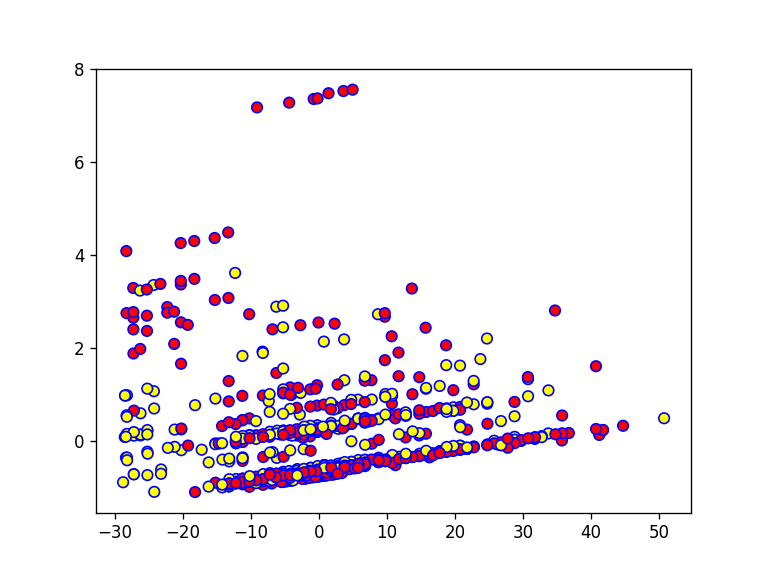

In [313]:
show_reduced = pca.fit_transform(titanic_data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']])

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], c=titanic_data.Survived,
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

<IPython.core.display.Javascript object>


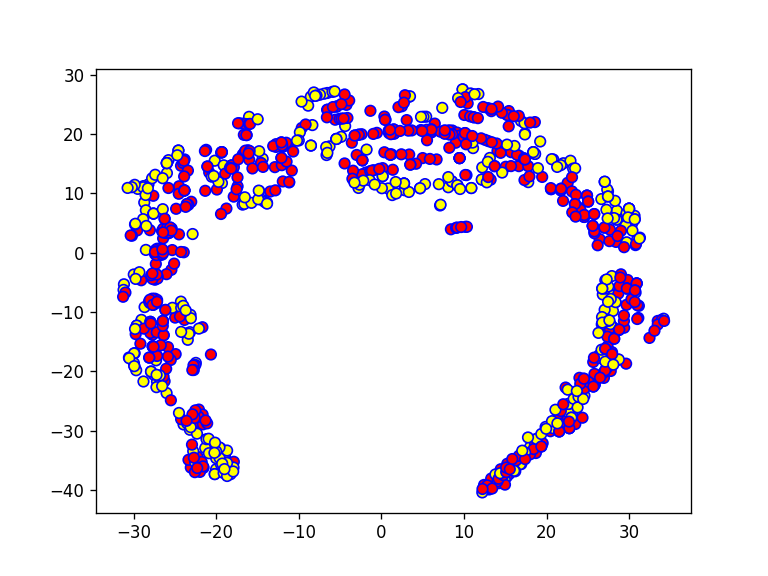

In [314]:
show_reduced = tsne.fit_transform(titanic_data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']])

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], c=titanic_data.Survived,
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

<IPython.core.display.Javascript object>


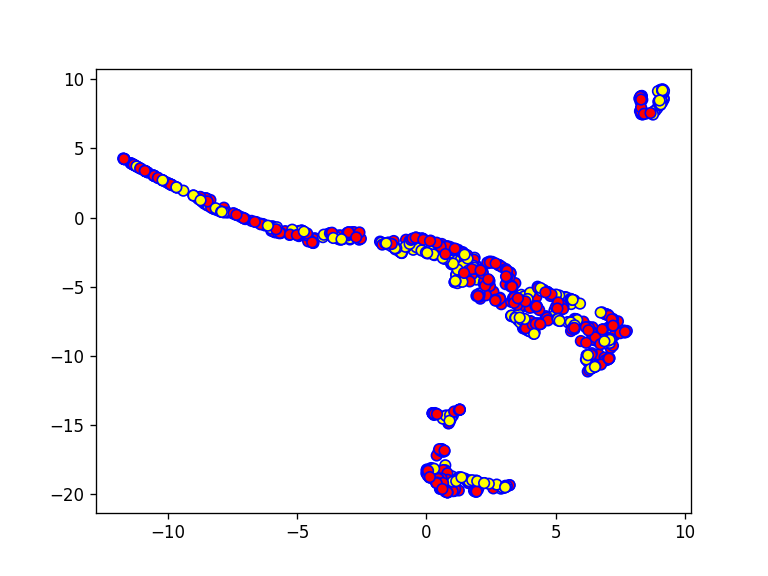

In [315]:
show_reduced = umap_emb.fit_transform(titanic_data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']])

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], c=titanic_data.Survived,
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

<IPython.core.display.Javascript object>


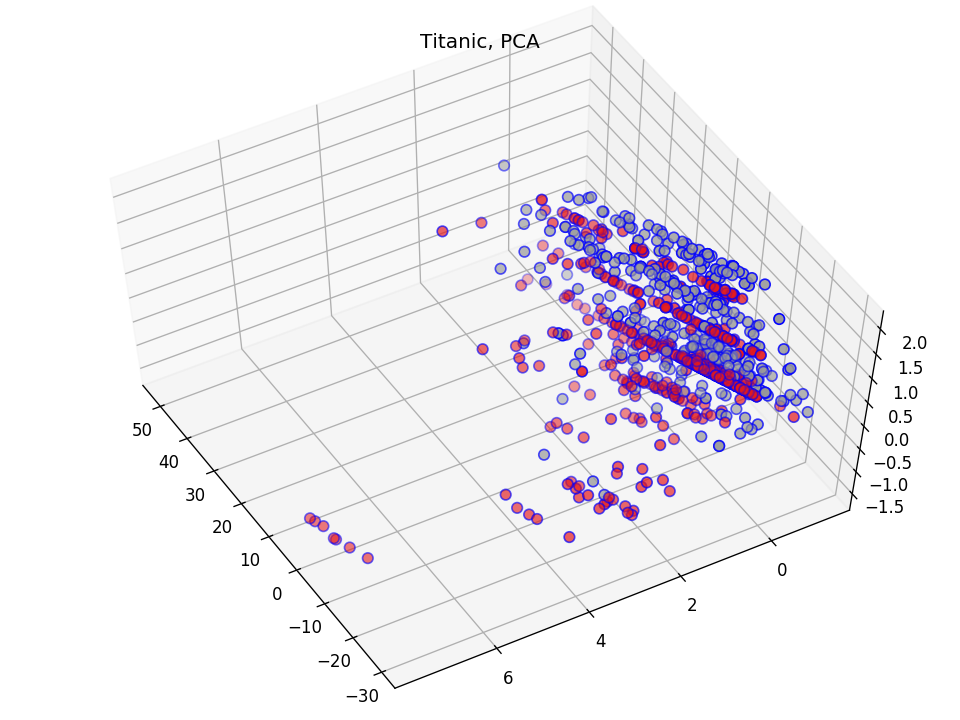

In [316]:
pca3=PCA(n_components=3)
show_reduced = pca3.fit_transform(titanic_data)

fig = plt.figure(2, figsize=(8, 6))
ax = Axes3D(fig, elev=60, azim=150)
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], show_reduced[:, 2], c=titanic_data.Survived, 
               cmap=plt.cm.Set1, edgecolor='b', s=40)
ax.set_title("Titanic, PCA")

plt.show()

<IPython.core.display.Javascript object>


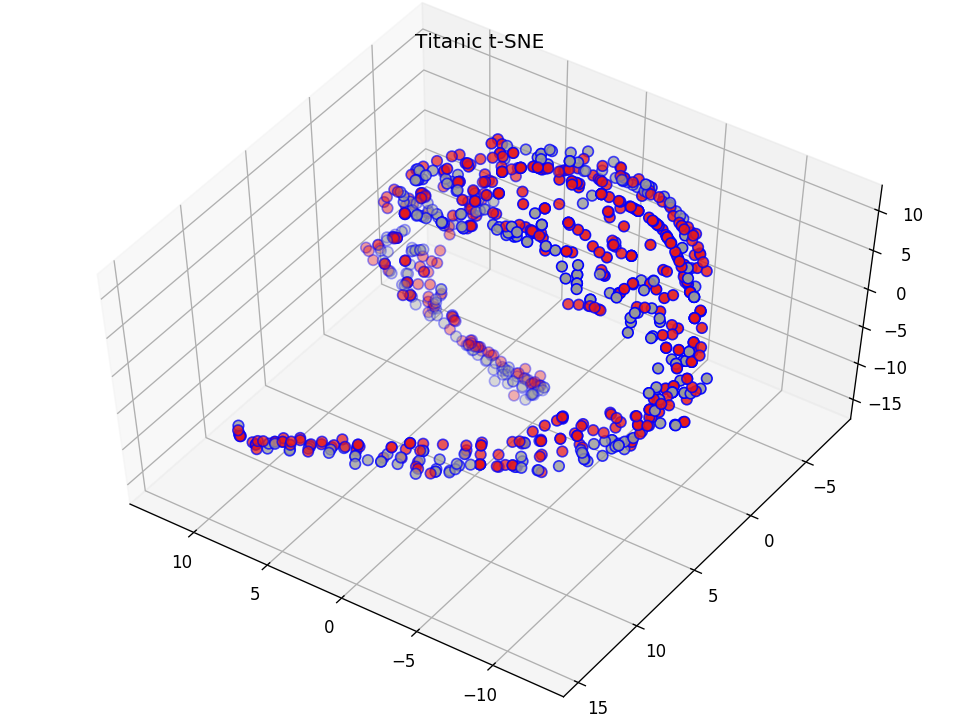

In [317]:
tsne3=TSNE(n_components=3)
show_reduced = tsne3.fit_transform(titanic_data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']])

fig = plt.figure(3, figsize=(8, 6))
ax = Axes3D(fig, elev=60, azim=150)
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], show_reduced[:, 2], c=titanic_data.Survived, 
               cmap=plt.cm.Set1, edgecolor='b', s=40)
ax.set_title("Titanic t-SNE")

plt.show()

Кроме того, попробуем посмотреть как изменятся результаты классификации после применения преобразования пространства.

In [267]:
from sklearn.ensemble import RandomForestClassifier

from sklearn import cross_validation

In [321]:
scores = cross_validation.cross_val_score(RandomForestClassifier(n_jobs=4, n_estimators=40, criterion="entropy"), 
                                          titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']], 
                                          titanic_data['Survived'], 
                                          cv = 30)
print(scores.mean())

0.7856556667902608


In [322]:
reduced_titanic = pca3.fit_transform(titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']])

scores = cross_validation.cross_val_score(RandomForestClassifier(n_jobs=4, n_estimators=40, criterion="entropy"), 
                                          reduced_titanic, titanic_data['Survived'], 
                                          cv = 30)
print(scores.mean())

0.7467247559016191


In [323]:
reduced_titanic = tsne3.fit_transform(titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']])

scores = cross_validation.cross_val_score(RandomForestClassifier(n_jobs=4, n_estimators=40, criterion="entropy"), 
                                          reduced_titanic, titanic_data['Survived'], 
                                          cv = 30)
print(scores.mean())

0.7412717834631071


Как видно, исходный набор данных более точно отражает некоторые зависимости.

<h2>Визуализация еще одного набора данных</h2>

Давайте попробуем решить еще одну задачу. Имеется поток научных статей на русском и украинском языках. Необходимо автоматически определить язык статьи.<br>
Для решения данной задачи можно использовать один из двух подходов: словарный и алфавитный. В первом мы выделяем слова и проверяем какому алфавиту они относятся. Так, например, фраза <i>"Вони аналiзувались з метою виключення грубих помилок"</i> очевидно относится к украинскому языку, тогда как фраза "Они анализировались с целью исключения грубых ошибок" написана на русском. Однако, подобный подход требует наличия словарей соответствующих языков. Поэтому проще подсчитать статистику встречаемости букв и решить задачу класификации по ним.<br>
Для начала нам снова надо векторизовать пришедший текст. 

In [1]:
from collections import Counter

import codecs # Чтобы не было проблем с кодировками.

In [2]:
# Считываем файл со статьями, делим его на статьи, строим словарь с частотами букв для каждой статьи.
def loadLanguage(filename) -> (list, list):
    with codecs.open(filename, "rb", "utf-8") as infile:
        all_text=infile.read()
    article_texts=all_text.lower().split('=====\n')
    characters=[Counter(art) for art in article_texts]
#    characters2=[Counter([art[i]+art[i+1] for i in range(len(art)-1)]) for art in article_texts]
    return article_texts, characters

# Формируем общий алфавит для всех коллекций статей.
def formAlphabet(characters) -> dict:
    alphabet={}
    for ch in characters:
        for a in ch:
            alphabet.update(a)
    for i, k in enumerate(alphabet.keys()):
        alphabet[k]=i
    return alphabet

# Нормируем абсолютные частоты на сумму частот в каждой статье.
def normalizeSet(characters, alphabet, learning_set, shift=0):
    for i, cs in enumerate(characters):
        pos=shift+i
        for c in cs.keys():
            if c in alphabet.keys():
                learning_set[pos, alphabet[c]]=cs[c]
        learning_set[pos]/=sum(learning_set[pos])

In [3]:
# Считываем обучающие и тестовую выборки.
ukr_article_texts, ukr_characters = loadLanguage('/home/edward/projects/TEST/getRusCorpora/Python/ukr_articles.txt')
rus_article_texts, rus_characters = loadLanguage('/home/edward/projects/TEST/getRusCorpora/Python/rus_articles.txt')
test_article_texts, test_characters = loadLanguage('/home/edward/projects/TEST/getRusCorpora/Python/test_articles.txt')

# Формируем алфавит.
alphabet= formAlphabet([ukr_characters, rus_characters])

# Нормализуем обучающие выборки и формируем вектор с номерами классов для них.
learning_set=np.zeros((len(ukr_article_texts)+len(rus_article_texts), len(alphabet.keys())))
normalizeSet(ukr_characters, alphabet, learning_set)
normalizeSet(rus_characters, alphabet, learning_set, len(ukr_article_texts))

classes=np.zeros((len(ukr_article_texts)+len(rus_article_texts), ))
classes[len(ukr_article_texts):]=1

# Нормализуем тестовую выборку и формируем для нее вектор с номерами классов.
test_set=np.zeros((len(test_article_texts), len(alphabet.keys())))
normalizeSet(test_characters, alphabet, test_set)

test_classes=np.zeros((len(test_article_texts), ))
test_classes[:33]=1

Теперь попробуем на этих данных обучить <b>логистическую регрессию</b>.<br>
Натренируем модель на обучающей выборке, попробуем предсказать результат на тестовой выборке.<br>
Также, построим <a href="https://en.wikipedia.org/wiki/Confusion_matrix">матрицу ошибок</a>, которая будет показывать нам где модель ошибается больше всего.<br>

In [4]:
import sklearn.linear_model as sklinear

In [5]:
# Создаем объект для логистической регрессии.
model=sklinear.LogisticRegression()
# Проводим обучение на обучающей выборке.
model.fit(learning_set, classes)
# Строим предсказание для тестовой выборки.
predicted=model.predict(test_set)
# Строим матрицу ошибок.
errors=np.zeros((2,2))
for i, p in enumerate(predicted):
    errors[int(p)][int(test_classes[i])]+=1
print(errors)


[[33. 33.]
 [ 0.  0.]]


In [6]:
predicted

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Что-то явно пошло не так. Модель классифицирует все статьи как русские. Хорошо бы понять почему.<br>
Для этого здорово было бы взглянуть на получившиеся точки. Отобразить пространство размерностью около сотни параметров в плоскость. Количество параметров определяется размером алфавита.<br>

In [7]:
print(len(alphabet))
print(list(alphabet)[:30])

141
['\n', ' ', '<', 'd', 'i', 'v', 'c', 'l', 'a', 's', '=', '"', 'o', 'r', '-', 'b', 'n', 'e', '>', 'p', 't', '/', '\ufeff', 'у', 'д', 'к', '6', '2', '4', '.']


<IPython.core.display.Javascript object>


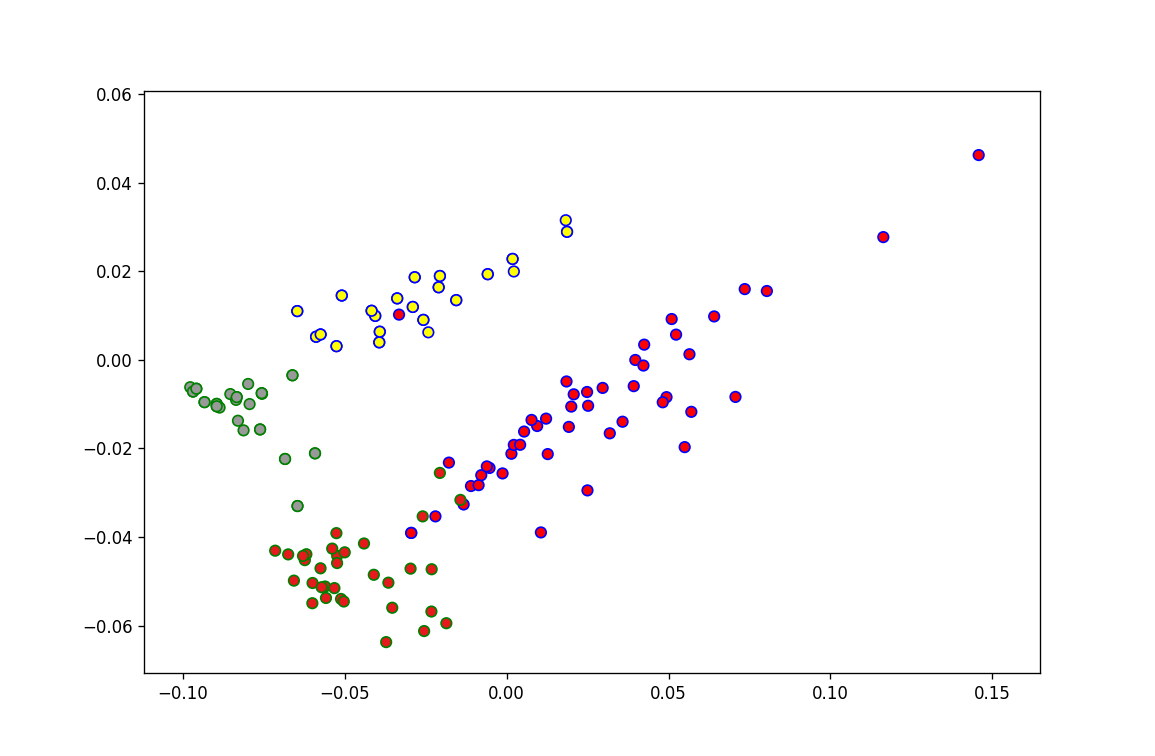

In [9]:
# Создаем модель для преобразования пространства. 
pca = PCA()
# Настраиваем коэффициенты модели и преобразуем обучающую выборку в двумерное пространство.
show_reduced = pca.fit_transform(learning_set)
# По полученным коэффициентам преобразовываем тестовую выборку.
test_reduced = pca.transform(test_set)
# Создаем рисунок и оси.
fig, ax = plt.subplots()
# Рисуем преобразованные обучающую и тестовые выборки.
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], c=classes,
           cmap=plt.cm.autumn, edgecolor='b', s=40)
ax.scatter(test_reduced[:, 0], test_reduced[:, 1], c=test_classes,
           cmap=plt.cm.Set1, edgecolor='g', s=40)
plt.show()



Теперь посмотрим как статьи на двух языках будут выглядеть в пространстве, преобразованном при помощи MDS.

<IPython.core.display.Javascript object>


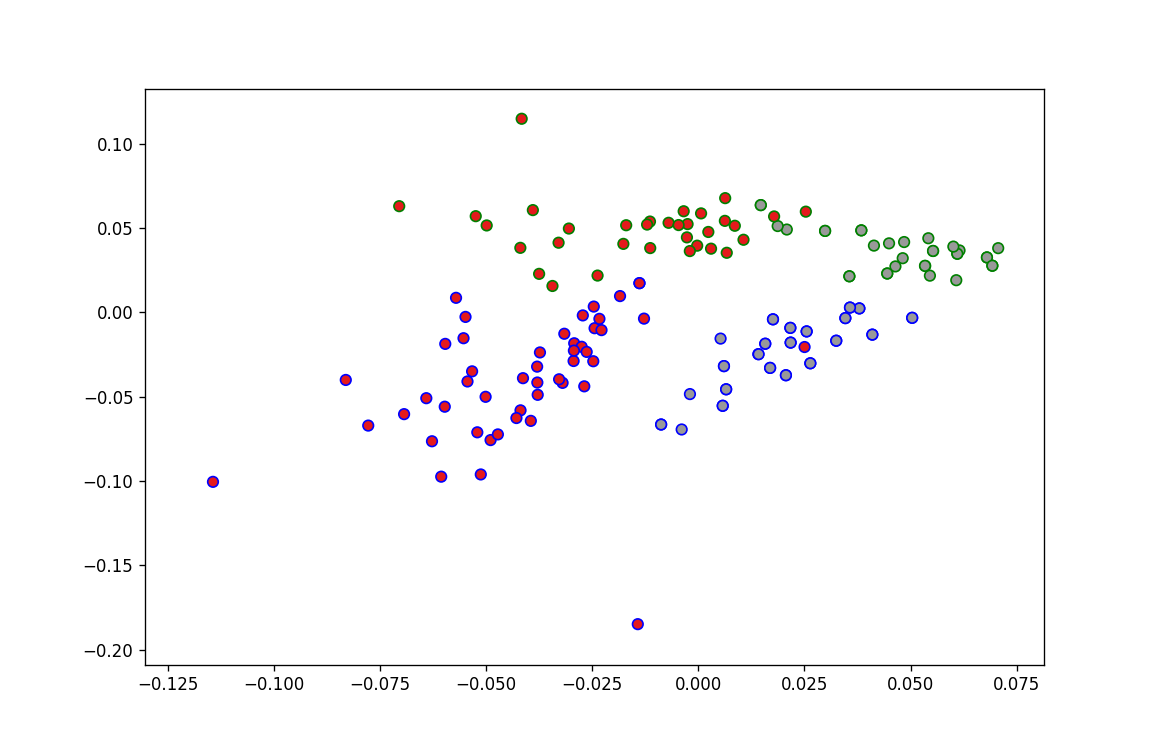

In [18]:
# Объединим две выборки, чтобы преобразовать их за один раз.
show_set=np.concatenate((learning_set, test_set))

# MDS начинает из случайной точки.
# random_state позволяет задать эту точку, чтобы получать один и тот же результат при разных прогонах.
mds=MDS(random_state=1023)
show_reduced = mds.fit_transform(show_set)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:len(learning_set), 0], show_reduced[:len(learning_set), 1], c=classes,
           cmap=plt.cm.Set1, edgecolor='b', s=40)
ax.scatter(show_reduced[len(learning_set):, 0], show_reduced[len(learning_set):, 1], c=test_classes,
           cmap=plt.cm.Set1, edgecolor='g', s=40)
plt.show()


Теперь попробуем применить к данной задаче метод t-SNE.

<IPython.core.display.Javascript object>


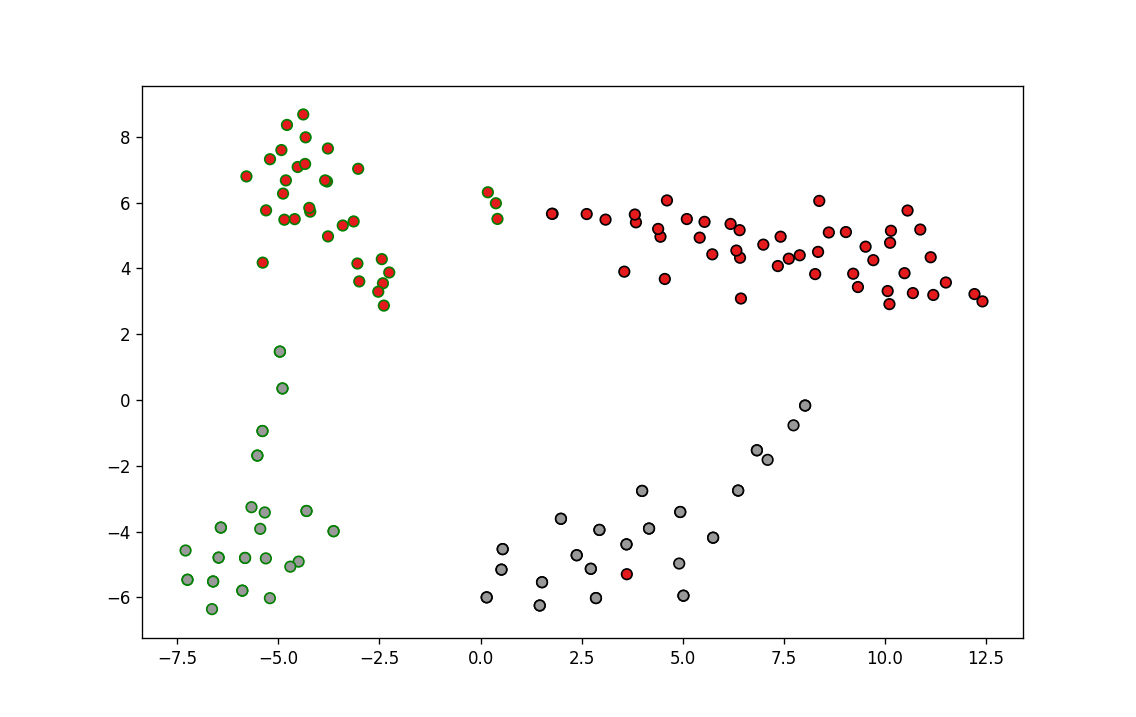

In [20]:
# Создаем объект TSNE, преобразовываем все точки.
tsne=TSNE()
show_reduced = tsne.fit_transform(show_set)

# Отрисовываем полученное отображение.
fig, ax = plt.subplots()
ax.scatter(show_reduced[:len(learning_set), 0], show_reduced[:len(learning_set), 1], c=classes,
           cmap=plt.cm.Set1, edgecolor='b', s=40)
ax.scatter(show_reduced[len(learning_set):, 0], show_reduced[len(learning_set):, 1], c=test_classes,
           cmap=plt.cm.Set1, edgecolor='g', s=40)
plt.show()


И посмотрим на результаты работы UMAP.

<IPython.core.display.Javascript object>


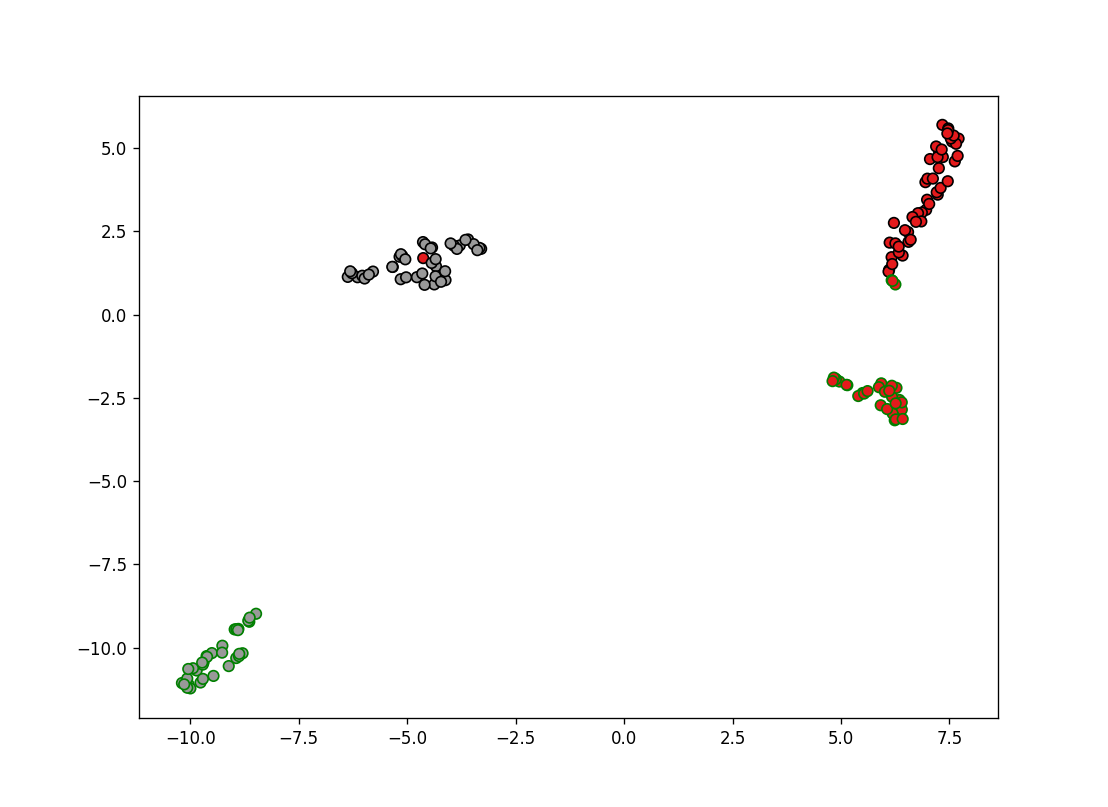

In [22]:
umap_emb=umap.UMAP()

show_reduced=umap_emb.fit_transform(show_set)

# Отрисовываем полученное отображение.
fig, ax = plt.subplots()
ax.scatter(show_reduced[:len(learning_set), 0], show_reduced[:len(learning_set), 1], c=classes,
           cmap=plt.cm.Set1, edgecolor='b', s=40)
ax.scatter(show_reduced[len(learning_set):, 0], show_reduced[len(learning_set):, 1], c=test_classes,
           cmap=plt.cm.Set1, edgecolor='g', s=40)
plt.show()


Попробуем решить задачу с определением языка при помощи UMAP.

In [42]:
show_set=np.concatenate((learning_set, test_set))

show_reduced = umap_emb.fit_transform(show_set)

learning_reduced = show_reduced[:len(learning_set)]
test_reduced = show_reduced[len(learning_set):]

model.fit(learning_reduced, classes)
predicted=model.predict(test_reduced)
errors=np.zeros((2,2))
for i, p in enumerate(predicted):
    errors[int(p)-1][int(test_classes[i])-1]+=1
print(predicted)
print(errors)
#print(test_article_texts[39])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
[[33. 14.]
 [ 0. 19.]]


Превосходно!<br><br>
В ходе анализа мы могли увидеть несколько вещей.<br>
Во-первых, данные устроены так, что они должны были разделиться даже линейной регрессией. Но что-то пошло не так. Скорее всего у нас просто слишком много параметров и регрессия не может нормально принять решение из-за большого шума.<br>
Во-вторых, мы видим, что обучающая и тестовая выборка серьезно отличаются. Да, разные языки в них могут быть отделены всё той же линией, но и обучающая и тестовая выборки тоже могут быть отделены друг от друга. Это произошло из-за того, что обучающая выборка была взята из статей по архитектуре, а тестовая - по информационным технологиям. Судя по всему, мо можем классифицировать тематику статей по <b>статистике употребления букв</b>.
И пользоваться нам всё равно придется PCA, поскольку только он умеет обучиться на одних данных, а потом преобразовывать другие.

In [43]:
# Создаем модель для преобразования пространства. 
pca=PCA(n_components=2)
# Настраиваем коэффициенты модели и преобразуем обучающую выборку в двумерное пространство.
show_reduced = pca.fit_transform(learning_set)
# По полученным коэффициентам преобразовываем тестовую выборку.
test_reduced=pca.transform(test_set)

model.fit(show_reduced, classes)

predicted=model.predict(test_reduced)
errors=np.zeros((2,2))
for i, p in enumerate(predicted):
    if p!=test_classes[i]:
        errors[int(p)-1][int(test_classes[i])-1]+=1
print(errors)


[[ 0.  0.]
 [33.  0.]]


Но PCA всё еще не работает, хотя должен был бы. Давайте попробуем разобраться что происходит. Может быть надо было взять больше параметров? Давайте попробуем отобразить всё в трехмерке.

<IPython.core.display.Javascript object>


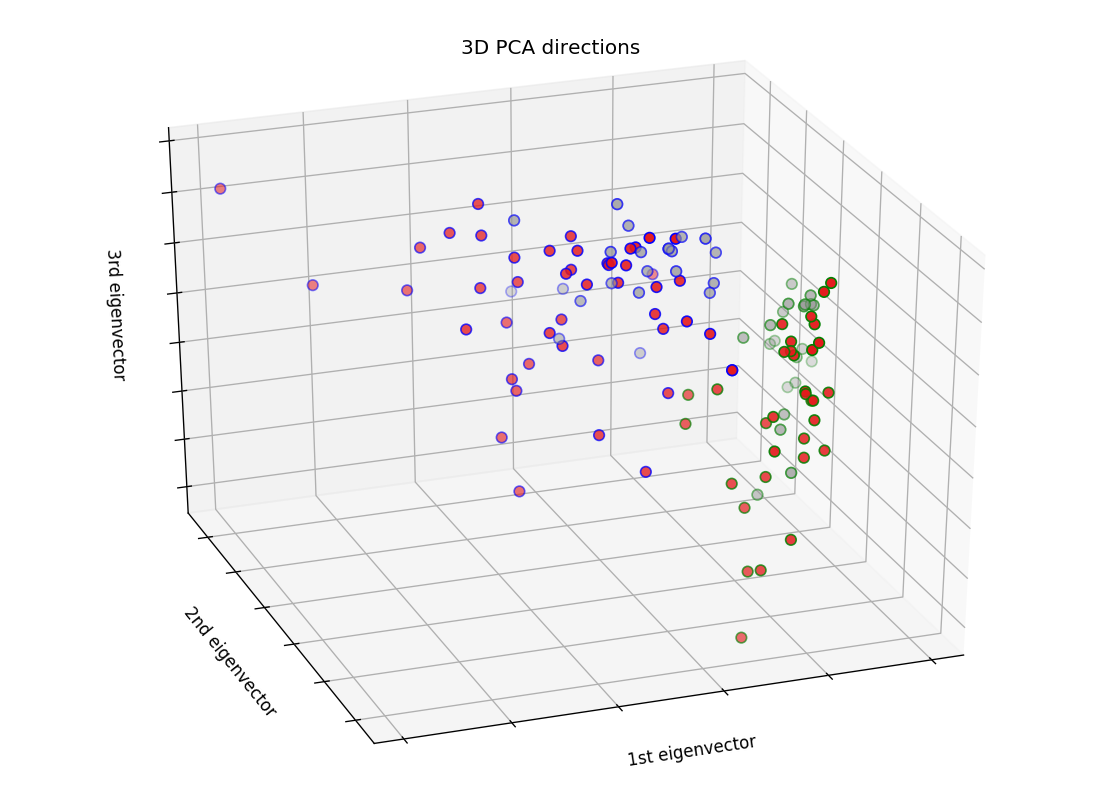

In [44]:
pca=PCA(n_components=3)
show_reduced = pca.fit_transform(learning_set)

test_reduced=pca.transform(test_set)

fig = plt.figure(4, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], show_reduced[:, 2], c=classes,
           cmap=plt.cm.Set1, edgecolor='b', s=40)
ax.scatter(test_reduced[:, 0], test_reduced[:, 1], test_reduced[:, 2], c=test_classes,
           cmap=plt.cm.Set1, edgecolor='g', s=40)
ax.set_title("3D PCA directions for articles")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

Может быть в четырех измерениях будет лучше?

In [104]:
import seaborn as sns
import pandas as pd

<IPython.core.display.Javascript object>


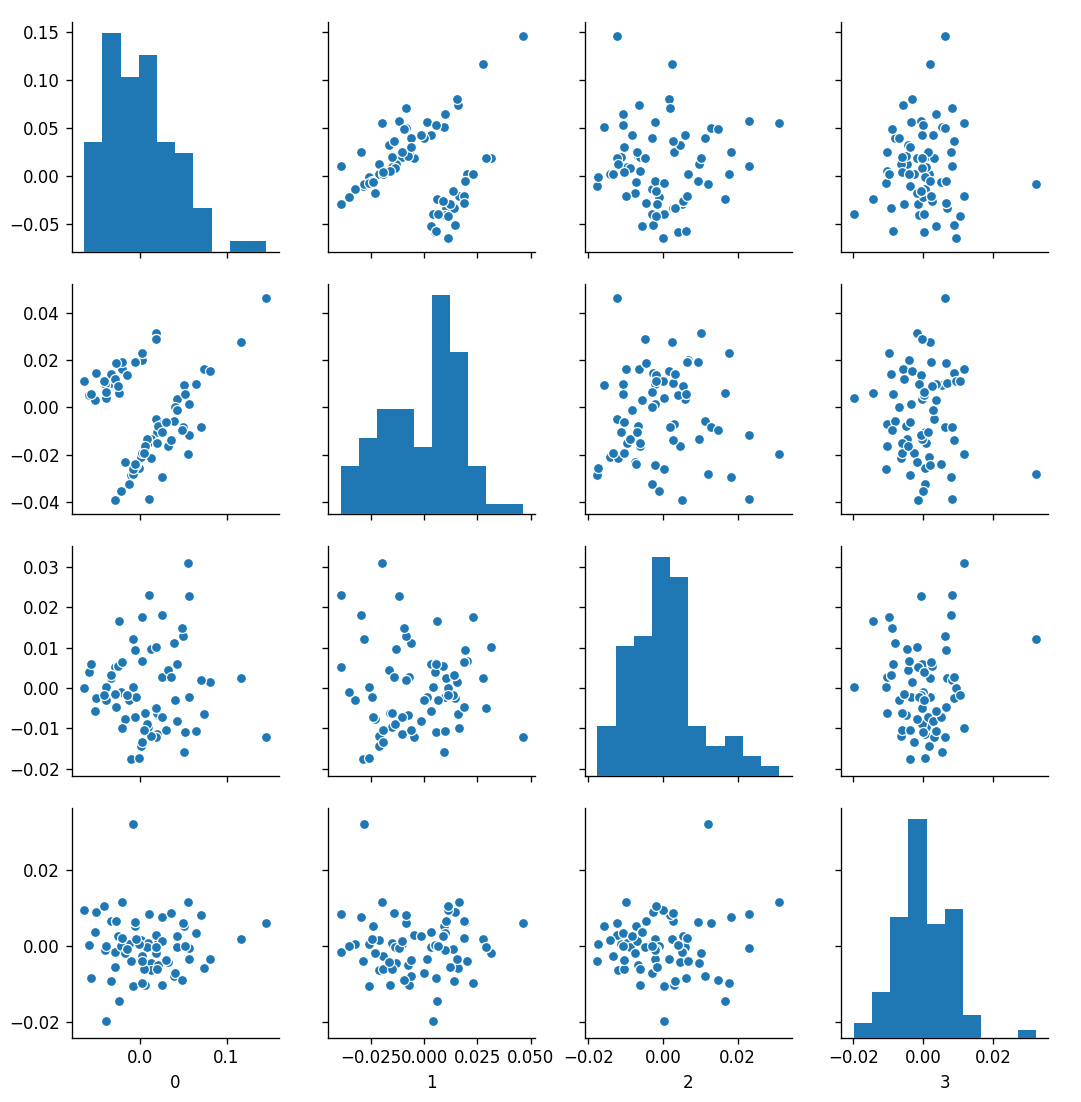

<IPython.core.display.Javascript object>


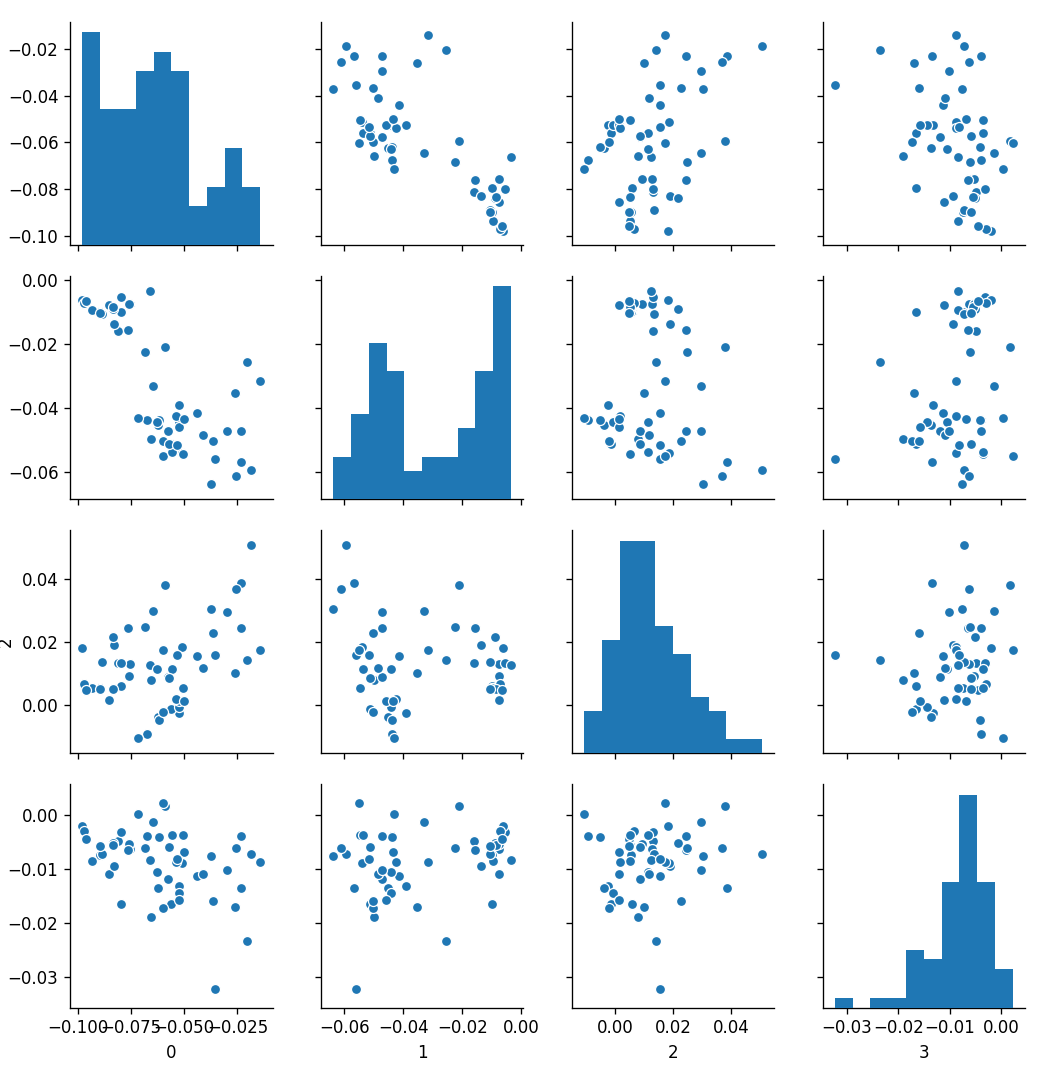

In [48]:
pca=PCA(n_components=4)
show_reduced = pca.fit_transform(learning_set)

test_reduced=pca.transform(test_set)

s_data=pd.DataFrame(show_reduced)
sns_plot = sns.pairplot(s_data)
sns_plot = sns.pairplot(pd.DataFrame(test_reduced))

А теперь выведем каким буквам соответствуют самые большие коэффициенты регрессии.<br>
Оказывается, классифицировать русские и украинские тексты можно просто посмотрев на чатоты встречаемости букв <i>i</i> и <i>и</i>. Из 141 параметра модели основное влияние оказывают лишь два! Если исправить коэффициенты логистической регрессии, то можео получить неплохие результаты.

In [59]:
model=sklinear.LogisticRegression()
model.fit(learning_set, classes)
#print(model.coef_)
predicted=model.predict(test_set)
errors=np.zeros((2,2))
for i, p in enumerate(predicted):
    errors[int(p)][int(test_classes[i])]+=1
print(predicted)
print(errors)

print(model.coef_.shape)
for i in range(model.coef_.shape[1]):
    if abs(model.coef_[0][i])<3e-1:
        model.coef_[0][i]=0
    else:
        k1='@'
        for k in alphabet.keys():
            if alphabet[k]==i:
                k1=k
                break
        print(k1, i, model.coef_[0][i])
model.coef_[0]=0
model.coef_[0][4]=8
model.coef_[0][45]=-0.5
#print(model.coef_)
predicted=model.predict(test_set)
predicted=2-predicted
errors=np.zeros((2,2))
for i, p in enumerate(predicted):
    errors[int(p-1)][int(test_classes[i]-1)]+=1
print(predicted)
print(errors)

#print(learning_set[0])

print(learning_set[:,51])
print(test_set[:,51])


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[33. 33.]
 [ 0.  0.]]
(1, 141)
  1 -0.67104557495004
i 4 -0.3574133218348277
о 35 0.3489492755609055
с 39 0.3356164864354527
е 41 0.5815725101279031
и 45 0.4220911914432303
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[ 0. 31.]
 [33.  2.]]
[0.00390538 0.00541596 0.00661593 0.00757103 0.00331475 0.00519607
 0.00641983 0.00561854 0.00649482 0.00428029 0.00526932 0.0065303
 0.0065303  0.0030654  0.00621728 0.00410505 0.00280873 0.00726543
 0.00684519 0.00826446 0.00637255 0.00521949 0.00496208 0.00523208
 0.00606249 0.00197896 0.00391236 0.0070888  0.00519578 0.00429605
 0.01125128 0.00526792 0.00613497 0.00463768 0.0053816  0.0026017

<h2>Ипользование Word2Vec при обработке текстов</h2>

А теперь вернемся от научных статей к новостям. <br>
Оформим наш класс загрузки новостей с Ленты в виде отдельного питоновского модуля и импортируем оттуда сам класс и функцию расчета косинусной меры сходства. Вот оно удобство классов: пишешь однажды, используешь всегда!

In [2]:
from getnewspaper import getNewsPaper
from getnewspaper import cosineSimilarity

Теперь попробуем применить для решения той же задачи модель Word2Vec, основная идея которой состоит в следующем. До сих пор мы работали в пространстве, размерность которого составляет несколько десятков, а может быть и сотен, тысяч измерений - по количеству используемых слов. Однако рядом будут находиться измерения для слов "бегемот" и "гиппопотам", являющихся синонимами. Следовательно, удалив одинаковые слова, мы можем снизить размерность пространства и уменьшить количество вычислений.<br>
Более того, каждое слово может быть выражено при помощи некоторых базовых понятий. Давайте попробуем отобразить теперь каждое слово в новое пространство, измерениями которого будут эти базовые понятия. Например, "король" будет раскладываться по измерениям "люди" (со значениями <b>"мужчина"</b> и "женщина"), "возраст" ("молодой", <b>"зрелый"</b>, "старый"), "власть" (<b>"верховная"</b>, "среднее звено", "местная", "локальная") и другим. При этом координаты не обязаны принимать заданные дискретные значения.<br>
Координаты слова в новом семантическом пространстве будут задаваться соседними словами. "Кушать" будет попадаться чаще с живыми существами, едой или посудой; "бегать" можно по некоторым местам и т.д. Правда, глаза могут и бегать, и есть. Это не будет добавлять модели детерминизма.<br>
Чтобы не мучиться в выбором новой системы координат натренируем некоторую модель, которая сама будет проводить уменьшение размерности пространства, а нам будет оставаться только выбрать число измерений. Эта же модель будет заниматься преобразованием точек старого пространства в новое. В этом новом семантическом пространстве становятся возможны векторные операции - сложение и вычитание. Разработчики модели Word2Vec утверждают, что они смогли получить "King"+"Man"-"Woman"="Queen". Посмотрим, получится ли у нас.

In [4]:
# Импортируем библиотеки Word2Vec
from gensim.models.word2vec import Word2Vec # Собственно модель.
from gensim.models.word2vec import LineSentence # Выравнивание текста по предложениям.
from gensim.models import KeyedVectors # Семантические вектора.
# На самом деле, нам потребуется только последняя.
import numpy as np # Вектора.

Теперь загрузим модель, обученную разработчиками проекта <a href="http://rusvectores.org/ru/models/">RusVectores</a> для русского языка на новостях. В зависимости от того, откуда вы берете модели, они могут загружаться по-разному. Более того, модель можно обучить самому - для этого нужно просто взять много размеченных текстов.

In [5]:
model_w2v = KeyedVectors.load_word2vec_format('/home/edward/papers/kourses/Advanced Python/skillfactory/news_upos_cbow_600_2_2018.vec')

Теперь можно получить представление слов в новом пространстве. Имейте в виду, что в данной модели они идут с частями речи!

In [6]:
model_w2v['огонь_NOUN']

array([ 5.58170e-02,  4.41830e-02, -1.71040e-02, -4.57520e-02,
        2.04150e-02, -2.40040e-02,  4.09340e-02,  3.11130e-02,
       -3.95260e-02,  2.20970e-02,  2.24920e-02,  1.92750e-02,
        2.78080e-02,  4.49070e-02,  5.63220e-02,  4.45900e-03,
        4.61480e-02,  3.07340e-02, -6.30660e-02,  7.29010e-02,
        7.12300e-03, -1.71800e-02,  1.96740e-02,  2.98010e-02,
        2.71750e-02,  8.77070e-02, -1.97520e-02,  3.35100e-03,
       -7.84200e-03,  8.84600e-03, -3.89400e-02,  1.03100e-02,
        2.48070e-02, -4.09000e-03, -1.73660e-02, -7.46190e-02,
        1.10265e-01,  2.89020e-02, -5.00060e-02,  4.90970e-02,
       -4.85360e-02,  3.00110e-02,  3.67230e-02,  3.55780e-02,
       -7.86430e-02, -6.60400e-03, -1.02970e-02, -4.44200e-03,
        6.34600e-02,  1.40280e-02, -6.75700e-03, -1.19300e-03,
       -4.25510e-02, -2.17790e-02,  7.87590e-02, -8.13890e-02,
        1.08440e-02, -3.11530e-02,  6.01860e-02,  8.62800e-03,
       -3.41890e-02, -3.25180e-02, -1.70000e-05, -1.411

Среди прочего, библиотека позволяет найти наиболее близкие слова к данному. Или даже к сочетанию слов.

In [7]:
#model_w2v.most_similar(positive=[u'пожар_NOUN'])
#model_w2v.most_similar(positive=[u'пожар_NOUN', u'пламя_NOUN' ])
#model_w2v.most_similar(positive=[u'пожар_NOUN', u'пламя_NOUN' ], negative=[u'топливо_NOUN'])
#model_w2v.most_similar(positive=[u'женщина_NOUN', u'император_NOUN' ], negative=[u'мужчина_NOUN'])
model_w2v.most_similar(positive=[u'женщина_NOUN', u'король_NOUN' ])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('монарх_NOUN', 0.49588513374328613),
 ('девушка_NOUN', 0.4720592498779297),
 ('пенсионерка_NOUN', 0.4685564935207367),
 ('мужчина_NOUN', 0.4612903594970703),
 ('старушка_NOUN', 0.45990070700645447),
 ('принц_NOUN', 0.43595051765441895),
 ('мать_NOUN', 0.42932039499282837),
 ('человек_NOUN', 0.42895567417144775),
 ('девочка_NOUN', 0.41597938537597656),
 ('испания::фелипе_PROPN', 0.41262727975845337)]

У нас есть смысл отдельных слов. Построим на его основе смысл текста как среднее арифметическое всех векторов для слов, составляющих данный текст.

In [8]:
def text_to_vec(dct, model, size):
    text_vec = np.zeros((size,), dtype="float32")
    n_words = 0

    index2word_set = set(model.index2word)
    for word in dct.keys():
        if word in index2word_set:
            n_words = n_words + 1
            text_vec = np.add(text_vec, model[word]) 
    
    if n_words != 0:
        text_vec /= n_words
    return text_vec


Переразметим наши тексты так, чтобы они содержали в себе и часть речи.

In [9]:
lentaPos=getNewsPaper()
lentaPos.loadArticles("lenta2018.txt")
lentaPos.calcArticleDictionaries(True)

Теперь посмотрим какова размерность векторов, хранимых в модели, и сколько в ней слов.

In [10]:
print(len(model_w2v['огонь_NOUN']))
print(len(model_w2v.index2word))

600
289191


Размерность векторов 600 - с запасом. Почти 300 000 слов - тоже очень хорошо.<br>
Теперь попробем найти косинусное расстояние между полученными векторами.

In [11]:
t2v1=text_to_vec(lentaPos.dictionaries[0], model_w2v, 600)
t2v2=text_to_vec(lentaPos.dictionaries[1], model_w2v, 600)
t2v516=text_to_vec(lentaPos.dictionaries[516], model_w2v, 600)
print(lentaPos.articles[0].split('\n-----\n')[0], lentaPos.articles[1].split('\n-----\n')[0])
print(cosineSimilarity(lentaPos.dictionaries[0], lentaPos.dictionaries[1]))
print(np.dot(t2v1, t2v2)/ np.linalg.norm(t2v1) / np.linalg.norm(t2v2))
print(lentaPos.articles[0].split('\n-----\n')[0], lentaPos.articles[516].split('\n-----\n')[0])
print(cosineSimilarity(lentaPos.dictionaries[0], lentaPos.dictionaries[516]))
print(np.dot(t2v1, t2v516)/ np.linalg.norm(t2v1) / np.linalg.norm(t2v516))

Раскрыто происхождение новейшей украинской крылатой ракеты Русских гопников назвали настоящими древними славянами
0.056637725889743556
0.32859382
Раскрыто происхождение новейшей украинской крылатой ракеты Россия поставила Украине оружие «сдерживания агрессора»
0.6522716186492549
0.8722236


Как видно, значения косинусной меры несколько выросли. Но может быть вектора можно просто вычитать и складывать?

In [12]:
print(lentaPos.articles[0].split('\n-----\n')[0], lentaPos.articles[1].split('\n-----\n')[0])
print(np.linalg.norm(t2v1-t2v2))
print(lentaPos.articles[0].split('\n-----\n')[0], lentaPos.articles[516].split('\n-----\n')[0])
print(np.linalg.norm(t2v1-t2v516))

Раскрыто происхождение новейшей украинской крылатой ракеты Русских гопников назвали настоящими древними славянами
0.26039347
Раскрыто происхождение новейшей украинской крылатой ракеты Россия поставила Украине оружие «сдерживания агрессора»
0.105189994


Всё логично - расстояние между последней парой статей должно быть меньше. Попробуем теперь решить нашу задачу - отбор новостей - новым методом. Для начала попробуем при помощи косинусной меры.

In [13]:
likesport=['Власти США обвинили МОК и ФИФА в коррупции', 'Пробирки WADA для допинг-проб оказались бракованными', 'Пожизненно отстраненных российских спортсменов оправдали', 'В Кремле порадовались за оправданных российских спортсменов', 'Россия вернется на первое место Олимпиады-2014', 'МОК разочаровало оправдание российских олимпийцев', 'Мутко загрустил после оправдания российских спортсменов', 'Оправданный призер Сочи-2014 призвал «добить ситуацию» с МОК', 'Путин предостерег от эйфории после оправдания российских олимпийцев', 'Родченков не смог вразумительно ответить на вопросы суда', 'Оправданный россиянин позлорадствовал над делившими медали Игр-2014 иностранцами', 'В CAS отказались считать оправданных россиян невиновными', 'Адвокат Родченкова заговорил о смерти чистого спорта после оправдания россиян', 'Американская скелетонистка сочла россиян ушедшими от законного наказания']
likeelect=['Социологи подсчитали планирующих проголосовать на выборах-2018', 'Собчак пообещала дать Трампу пару советов', 'На выборы президента России пойдут почти 80 процентов избирателей', 'Песков вспомнил предупреждение и отказался комментировать поездку Собчак в США', 'Собчак съездила на завтрак с Трампом и разочаровалась', 'Грудинин уступил в популярности КПРФ', 'Собчак потребовала признать незаконной регистрацию Путина на выборах', 'У Грудинина обнаружили два не до конца закрытых счета в Швейцарии и Австрии', 'Грудинин раскрыл историю происхождения дома в Испании', 'Путина зарегистрировали кандидатом в президенты', 'В Кремле отреагировали на слухи о голосовании Путина в Севастополе', 'Коммунистов вновь обвинили в незаконной агитации за Грудинина', 'ЦИК выявила обман со стороны Грудинина', 'Грудинин ответил на претензии ЦИК', 'Жириновский захотел сбросить ядерную бомбу на резиденцию Порошенко']

In [15]:
sporttext=' '.join([lentaPos.articles[lentaPos.findNewsByTitle(art)] for art in likesport])
sportdict=lentaPos.getArticleDictionary(sporttext)
electtext=' '.join([lentaPos.articles[lentaPos.findNewsByTitle(art)] for art in likeelect])
electdict=lentaPos.getArticleDictionary(electtext)

In [16]:
sportdictpos=lentaPos.getArticleDictionary(sporttext, True)
electdictpos=lentaPos.getArticleDictionary(electtext, True)

t2vs=text_to_vec(sportdictpos, model_w2v, 600)
t2ve=text_to_vec(electdictpos, model_w2v, 600)

In [17]:

thrs=0.85
thre=0.85

cosess=[lentaPos.articles[i].split('\n-----\n')[0] for i in range(len(lentaPos.dictionaries)) \
        if np.dot(t2vs, text_to_vec(lentaPos.dictionaries[i], model_w2v, 600))/ \
        np.linalg.norm(t2vs) / np.linalg.norm(text_to_vec(lentaPos.dictionaries[i], model_w2v, 600)) >thrs]
cosese=[lentaPos.articles[i].split('\n-----\n')[0] for i in range(len(lentaPos.dictionaries)) \
        if np.dot(t2ve, text_to_vec(lentaPos.dictionaries[i], model_w2v, 600))/ \
        np.linalg.norm(t2ve) / np.linalg.norm(text_to_vec(lentaPos.dictionaries[i], model_w2v, 600)) >thre]
print(thrs, thre)
print(cosess)
print(cosese)

thrs=0.8
thre=0.8

cosess=[lentaPos.articles[i].split('\n-----\n')[0] for i in range(len(lentaPos.dictionaries)) \
        if np.dot(t2vs, text_to_vec(lentaPos.dictionaries[i], model_w2v, 600))/ \
        np.linalg.norm(t2vs) / np.linalg.norm(text_to_vec(lentaPos.dictionaries[i], model_w2v, 600)) >thrs]
cosese=[lentaPos.articles[i].split('\n-----\n')[0] for i in range(len(lentaPos.dictionaries)) \
        if np.dot(t2ve, text_to_vec(lentaPos.dictionaries[i], model_w2v, 600))/ \
        np.linalg.norm(t2ve) / np.linalg.norm(text_to_vec(lentaPos.dictionaries[i], model_w2v, 600)) >thre]
print(thrs, thre)
print(cosess)
print(cosese)

thrs=0.9
thre=0.9

cosess=[lentaPos.articles[i].split('\n-----\n')[0] for i in range(len(lentaPos.dictionaries)) \
        if np.dot(t2vs, text_to_vec(lentaPos.dictionaries[i], model_w2v, 600))/ \
        np.linalg.norm(t2vs) / np.linalg.norm(text_to_vec(lentaPos.dictionaries[i], model_w2v, 600)) >thrs]
cosese=[lentaPos.articles[i].split('\n-----\n')[0] for i in range(len(lentaPos.dictionaries)) \
        if np.dot(t2ve, text_to_vec(lentaPos.dictionaries[i], model_w2v, 600))/ \
        np.linalg.norm(t2ve) / np.linalg.norm(text_to_vec(lentaPos.dictionaries[i], model_w2v, 600)) >thre]
print(thrs, thre)
print(cosess)
print(cosese)

0.85 0.85
['Пожизненно отстраненных российских спортсменов оправдали', 'МОК разочаровало оправдание российских олимпийцев', 'Мутко загрустил после оправдания российских спортсменов', 'Оправданный призер Сочи-2014 призвал «добить ситуацию» с МОК', 'Адвокат Родченкова заговорил о смерти чистого спорта после оправдания россиян', 'После оправдания российских спортсменов Макларена назвали идиотом', 'Родченкова сочли борцом за правое дело и помогли деньгами', 'Федерацию бобслея России обвинили в нежелании пускать спортсменов на Олимпиаду', 'Четырехкратный олимпийский чемпион встал на сторону россиян и пристыдил МОК', 'МОК обозначил сроки по решению о допуске оправданных россиян на Олимпиаду', 'В секретной базе найдены сотни аномальных допинг-проб', 'Немецкий биатлонист сравнил оправдание российских олимпийцев с плевком в лицо', 'Хакеры раскрыли канадский заговор против российского спорта', 'Песков вспомнил предупреждение и отказался комментировать поездку Собчак в США', 'Потерявший шансы поп

0.9 0.9
['МОК обозначил сроки по решению о допуске оправданных россиян на Олимпиаду', 'Отстраненные россияне лишились последнего шанса поехать на Олимпиаду']
['У Грудинина обнаружили два не до конца закрытых счета в Швейцарии и Австрии', 'Песков вспомнил предупреждение и отказался комментировать поездку Собчак в США', 'Песков назвал чушью слова Пономарева о предпосылках присоединения Крыма']


Как видно, результат очень сильно зависит от порогового значения. А теперь решим ее просто вычитая векторы.

In [18]:

thrs=0.15
thre=0.15

cosess=[lentaPos.articles[i].split('\n-----\n')[0] for i in range(len(lentaPos.dictionaries)) \
        if np.linalg.norm(t2vs-text_to_vec(lentaPos.dictionaries[i], model_w2v, 600))<thrs]
cosese=[lentaPos.articles[i].split('\n-----\n')[0] for i in range(len(lentaPos.dictionaries)) \
        if np.linalg.norm(t2ve-text_to_vec(lentaPos.dictionaries[i], model_w2v, 600))<thre]
print(thrs, thre)
print(cosess)
print(cosese)

thrs=0.2
thre=0.2

cosess=[lentaPos.articles[i].split('\n-----\n')[0] for i in range(len(lentaPos.dictionaries)) \
        if np.linalg.norm(t2vs-text_to_vec(lentaPos.dictionaries[i], model_w2v, 600))<thrs]
cosese=[lentaPos.articles[i].split('\n-----\n')[0] for i in range(len(lentaPos.dictionaries)) \
        if np.linalg.norm(t2ve-text_to_vec(lentaPos.dictionaries[i], model_w2v, 600))<thre]
print(thrs, thre)
print(cosess)
print(cosese)

thrs=0.1
thre=0.1

cosess=[lentaPos.articles[i].split('\n-----\n')[0] for i in range(len(lentaPos.dictionaries)) \
        if np.linalg.norm(t2vs-text_to_vec(lentaPos.dictionaries[i], model_w2v, 600))<thrs]
cosese=[lentaPos.articles[i].split('\n-----\n')[0] for i in range(len(lentaPos.dictionaries)) \
        if np.linalg.norm(t2ve-text_to_vec(lentaPos.dictionaries[i], model_w2v, 600))<thre]
print(thrs, thre)
print(cosess)
print(cosese)

0.15 0.15
['Социологи подсчитали планирующих проголосовать на выборах-2018', 'Власти США обвинили МОК и ФИФА в коррупции', 'Китайская детская задачка поставила в тупик взрослых по всему миру', 'Пожизненно отстраненных российских спортсменов оправдали', 'В Кремле порадовались за оправданных российских спортсменов', 'МОК разочаровало оправдание российских олимпийцев', 'Мутко загрустил после оправдания российских спортсменов', 'Шефы российских спецслужб приехали в США и удивили американцев', 'Президента Чехии уличили в связях с украинскими сепаратистами', 'Оправданный призер Сочи-2014 призвал «добить ситуацию» с МОК', 'Австралиец предложил два ноутбука за собственное убийство', 'Рассказавшего о скупающих черную икру украинцах политолога назвали порохоботом', 'Стрелявший под кокаином у Кремля Джабраилов постреляет еще', 'Путин предостерег от эйфории после оправдания российских олимпийцев', 'Родченков не смог вразумительно ответить на вопросы суда', 'Опубликовано ранее неизвестное интервью 

0.2 0.2
['Раскрыто происхождение новейшей украинской крылатой ракеты', 'Русских гопников назвали настоящими древними славянами', 'Открыт первый европейский бордель с секс-куклами вместо проституток', 'Социологи подсчитали планирующих проголосовать на выборах-2018', 'Звезду сериала «Детективы» задержали за работу детектива', 'Учитель угодил под суд за оральный секс со спящим школьником', 'Украинский депутат призвал к убийствам «непатриотов»', 'Прятавший трупы в цветочных горшках серийный убийца попался в Канаде', 'США провалили испытания противоракеты', 'Неймар заставит «Барселону» расплатиться', 'Любителей порно признали самыми удобными жертвами', 'Пентагон опубликовал новое видео перехвата разведчика США российским Су-27\u200d', 'Власти США обвинили МОК и ФИФА в коррупции', 'Составлен портрет типичного столичного преступника', 'Китайская детская задачка поставила в тупик взрослых по всему миру', 'Британский лорд опоздал на заседание и уволился со стыда', 'Звезда «Бандитского Петербург

0.1 0.1
['После оправдания российских спортсменов Макларена назвали идиотом', 'Родченкова сочли борцом за правое дело и помогли деньгами']
[]


И снова мы видим сильную зависимость от выбранного порога.

<h2>Кластеризация</h2>

Теперь попытаемся посмотреть, есть ли в новостной ленте какая-то скрытая структура. Для этого применим UMAP для отображения новостей на плоскость.

In [20]:
umap_news=umap.UMAP()
w2v_vectors=np.array([text_to_vec(dct, model_w2v, 600) for dct in lentaPos.dictionaries])

umaped_v=umap_news.fit_transform(w2v_vectors)


<IPython.core.display.Javascript object>


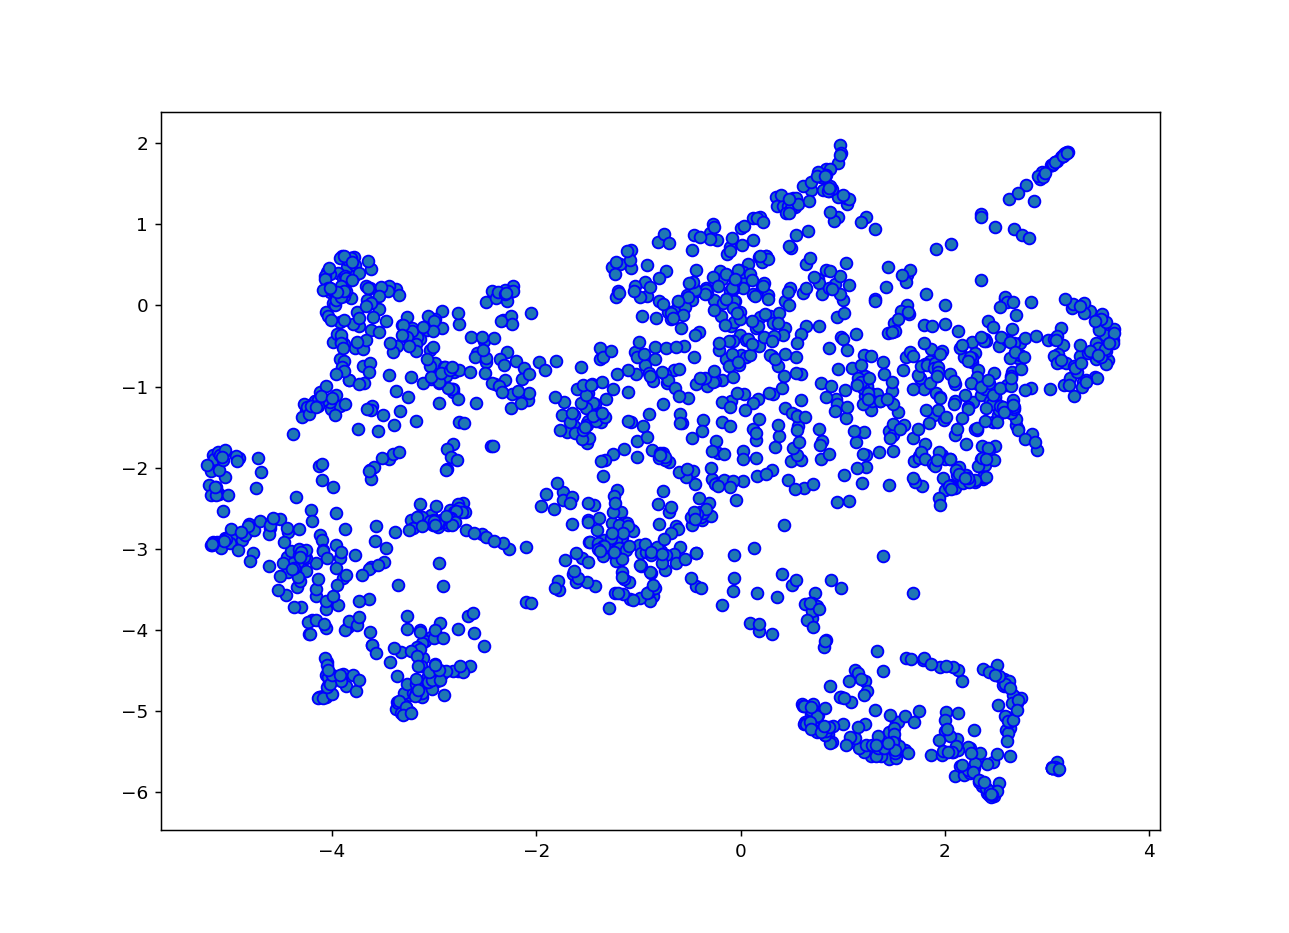

In [23]:
fig, ax = plt.subplots()
ax.scatter(umaped_v[:, 0], umaped_v[:, 1], edgecolor='b', s=40)
plt.show()

Структура очевидно есть. Хорошо бы попытаться выявить ее при помощи кластеризации.<br>
Для начала попробуем <a href="https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k-%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D1%85">метод k средних (k-means)</a>. Суть метода состоит в том, что мы кидаем k точек (центроидов) случайным образом. Далее мы определяем какие точки данных ближе к каким центроидам и пересчитываем положение центроидов. После нескольких шагов ситуация должна застабилизироваться.<br>
Проведем такую кластеризацию и посмотрим на результаты.<br>
Разным классам на рисунках ниже может соответствовать примерно один и тот же цвет. Но это не делает их одним и тем же кластером!

In [24]:
from sklearn.cluster import KMeans

<IPython.core.display.Javascript object>


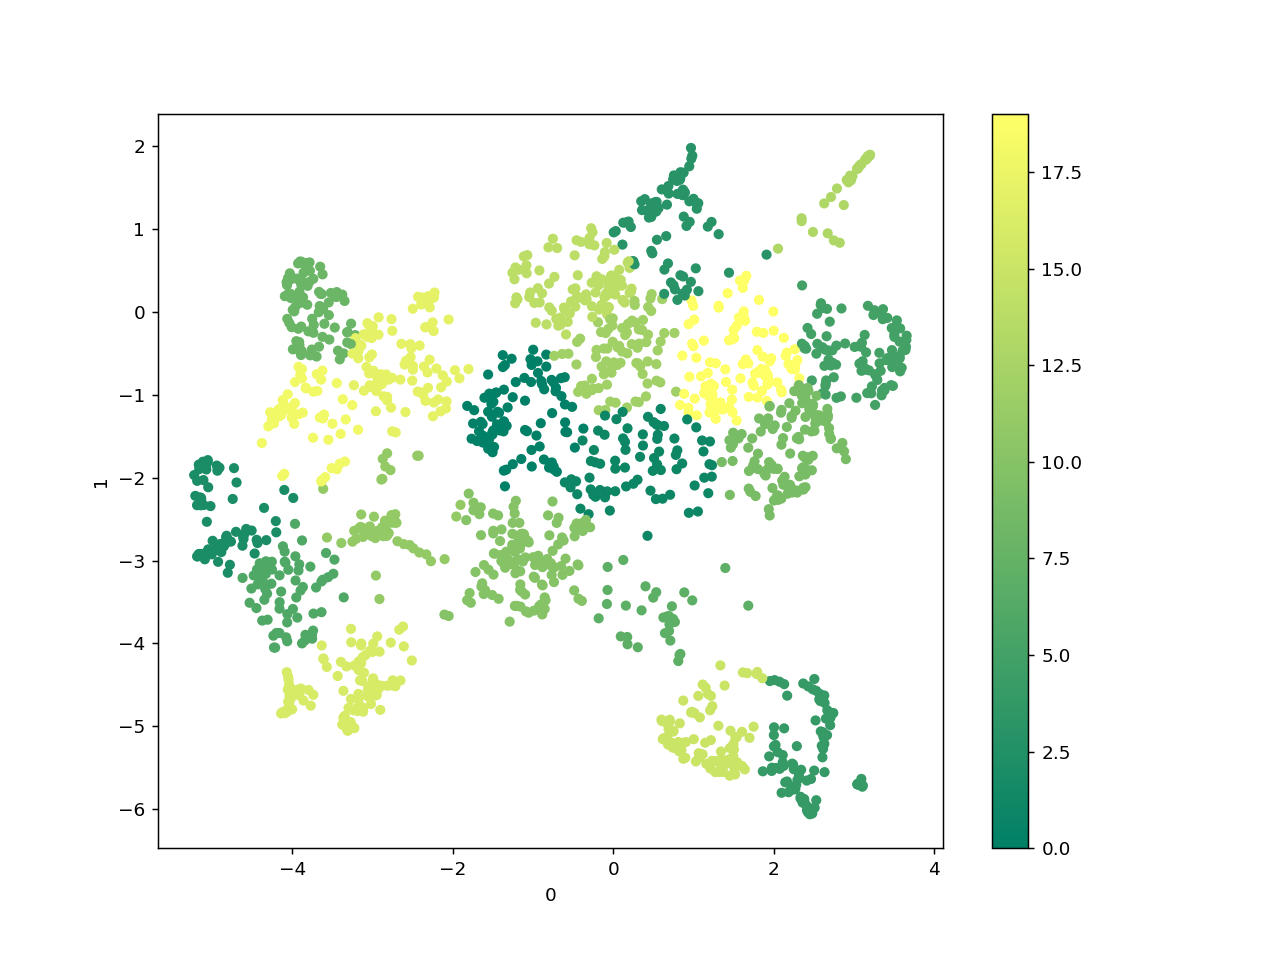

In [52]:
km=KMeans(n_clusters=20)
km_clusters=km.fit_predict(umaped_v)
ax=pd.DataFrame(umaped_v).plot.scatter(x=0, y=1, c=km_clusters, cmap=plt.cm.summer)

<a href="https://en.wikipedia.org/wiki/Spectral_clustering">Методу спектральной кластеризации</a> также требуется передать на вход количество кластеров.

In [54]:
from sklearn.cluster import SpectralClustering

<IPython.core.display.Javascript object>


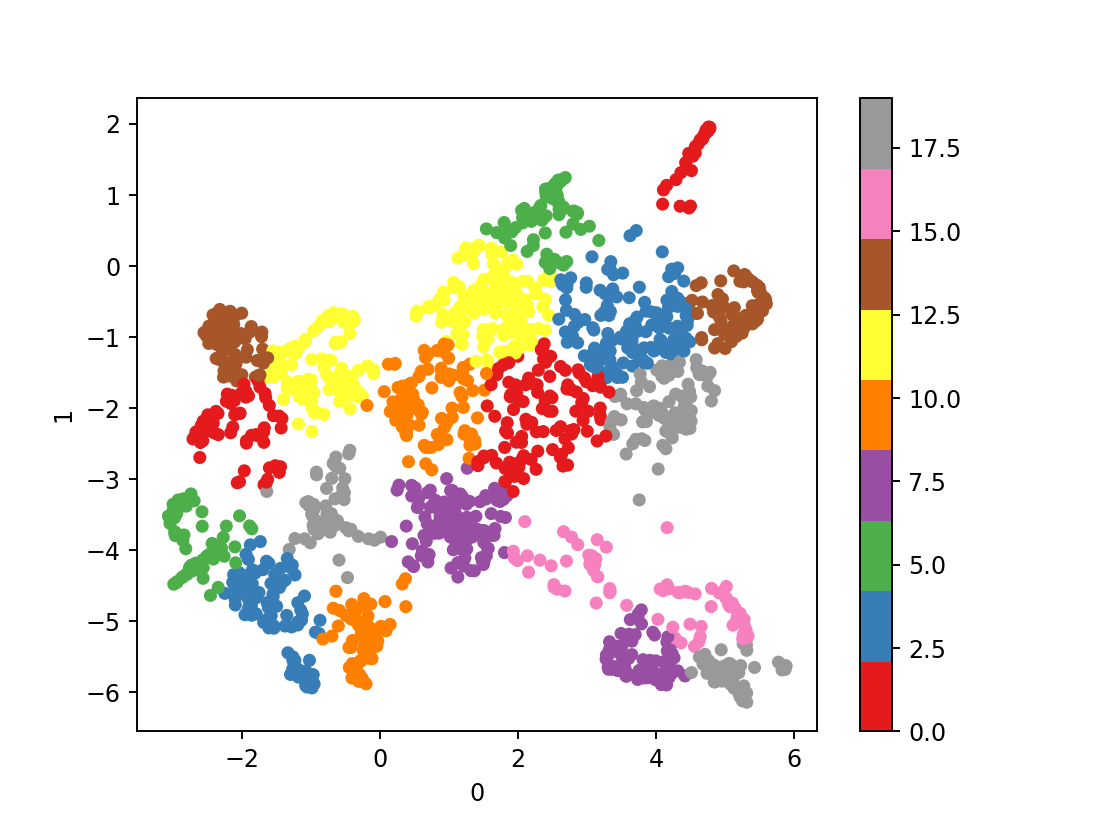

In [37]:
sc=SpectralClustering(n_clusters=20)
sc_clusters=sc.fit_predict(umaped_v)
ax=pd.DataFrame(umaped_v).plot.scatter(x=0, y=1, c=sc_clusters, cmap=plt.cm.Set1)

Также попробуемм <a href="https://en.wikipedia.org/wiki/DBSCAN">метод DBSCAN</a>, который веделяет области с наибольшей плотностью точек и последовательно включает в кластер точки, находящиеся ближе определенной границы к точкам, уже включенным в кластер. Данному методу не надо указывать количество кластеров, он сам их определит. Но лучше задать правдоподобные параметры eps и min_samples.

In [58]:
from sklearn.cluster import DBSCAN

<IPython.core.display.Javascript object>


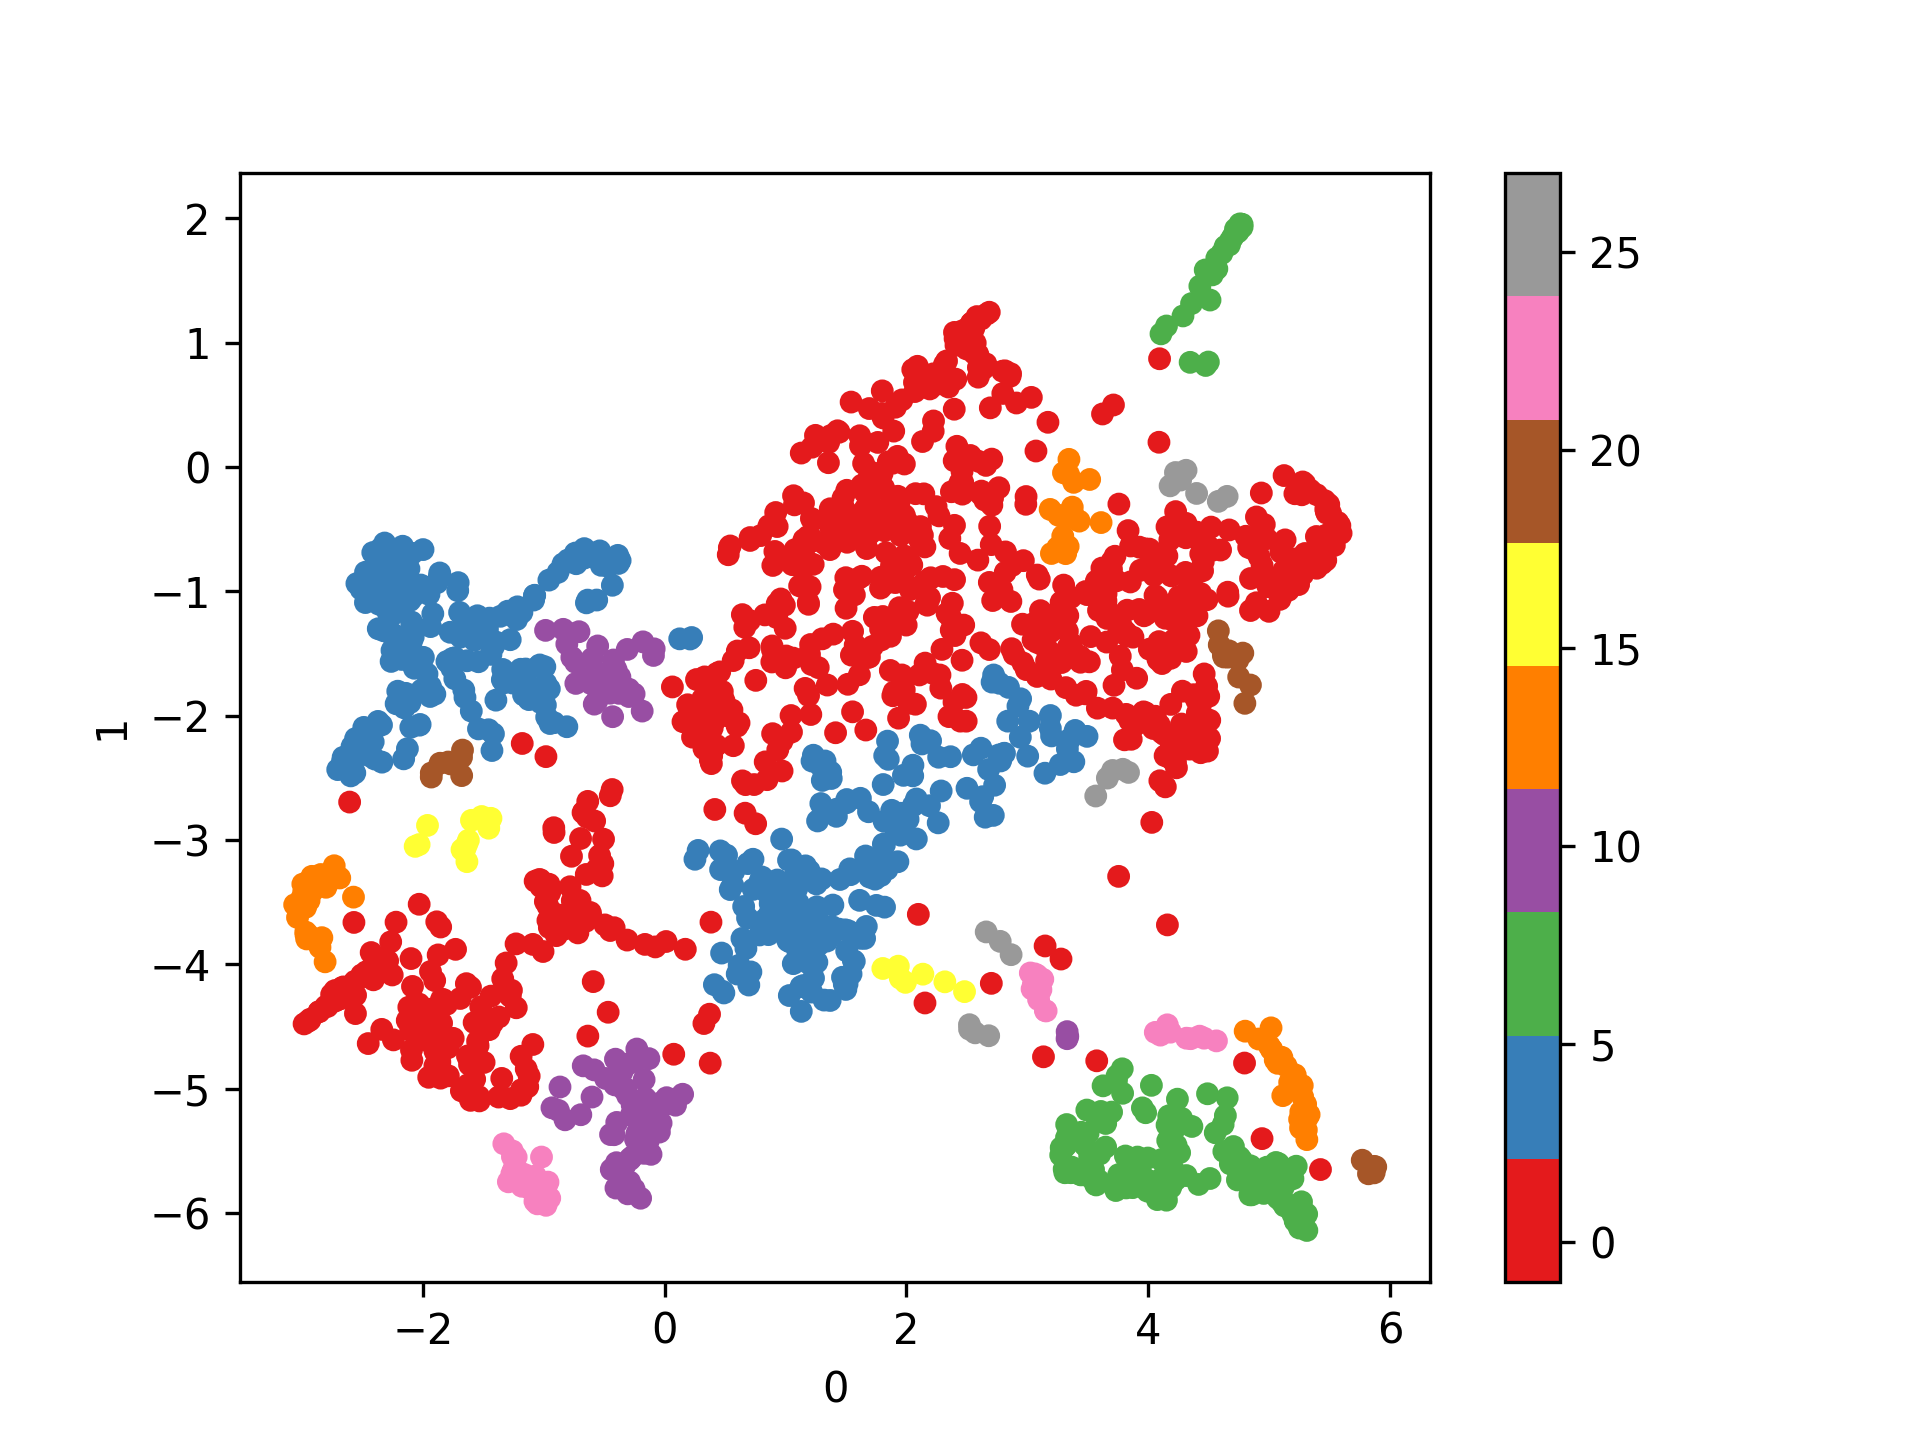

In [67]:
db=DBSCAN(eps=0.2, min_samples=3)
db_clusters=db.fit_predict(umaped_v)
ax=pd.DataFrame(umaped_v).plot.scatter(x=0, y=1, c=db_clusters, cmap=plt.cm.Set1)

Также взглянем на иерархическую (в данном случае - аггломеративную) кластеризацию.

In [120]:
from sklearn.cluster import AgglomerativeClustering

<IPython.core.display.Javascript object>


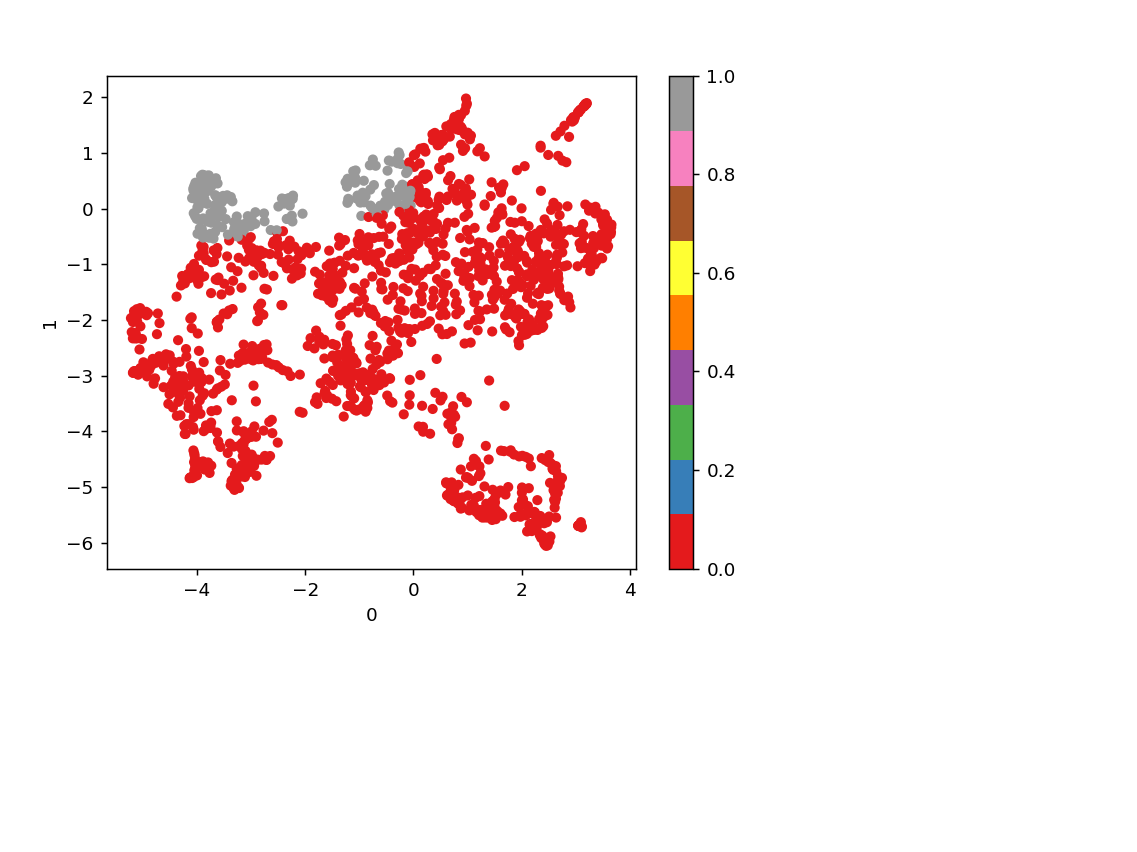

In [143]:
ag=AgglomerativeClustering(linkage="complete", affinity="cosine")#, "average")
ag_clusters=ag.fit_predict(umaped_v)
ax=pd.DataFrame(umaped_v).plot.scatter(x=0, y=1, c=ag_clusters, cmap=plt.cm.Set1)

Работу метода можно визуализировать при помощи дендрограммы.

In [192]:
from scipy.cluster.hierarchy import dendrogram, linkage

<IPython.core.display.Javascript object>


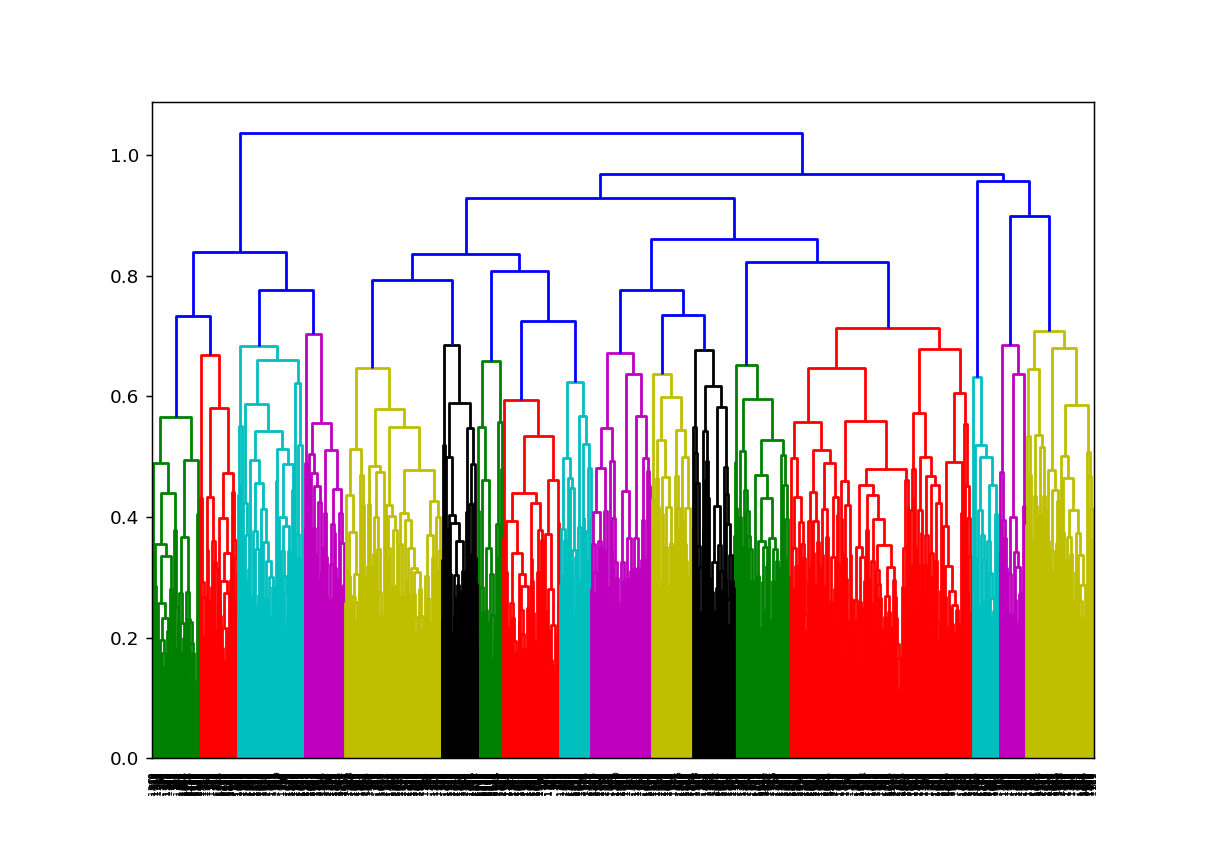

In [200]:
Z = linkage(w2v_vectors, method='complete', metric='cosine')
_ = dendrogram(Z)

<IPython.core.display.Javascript object>


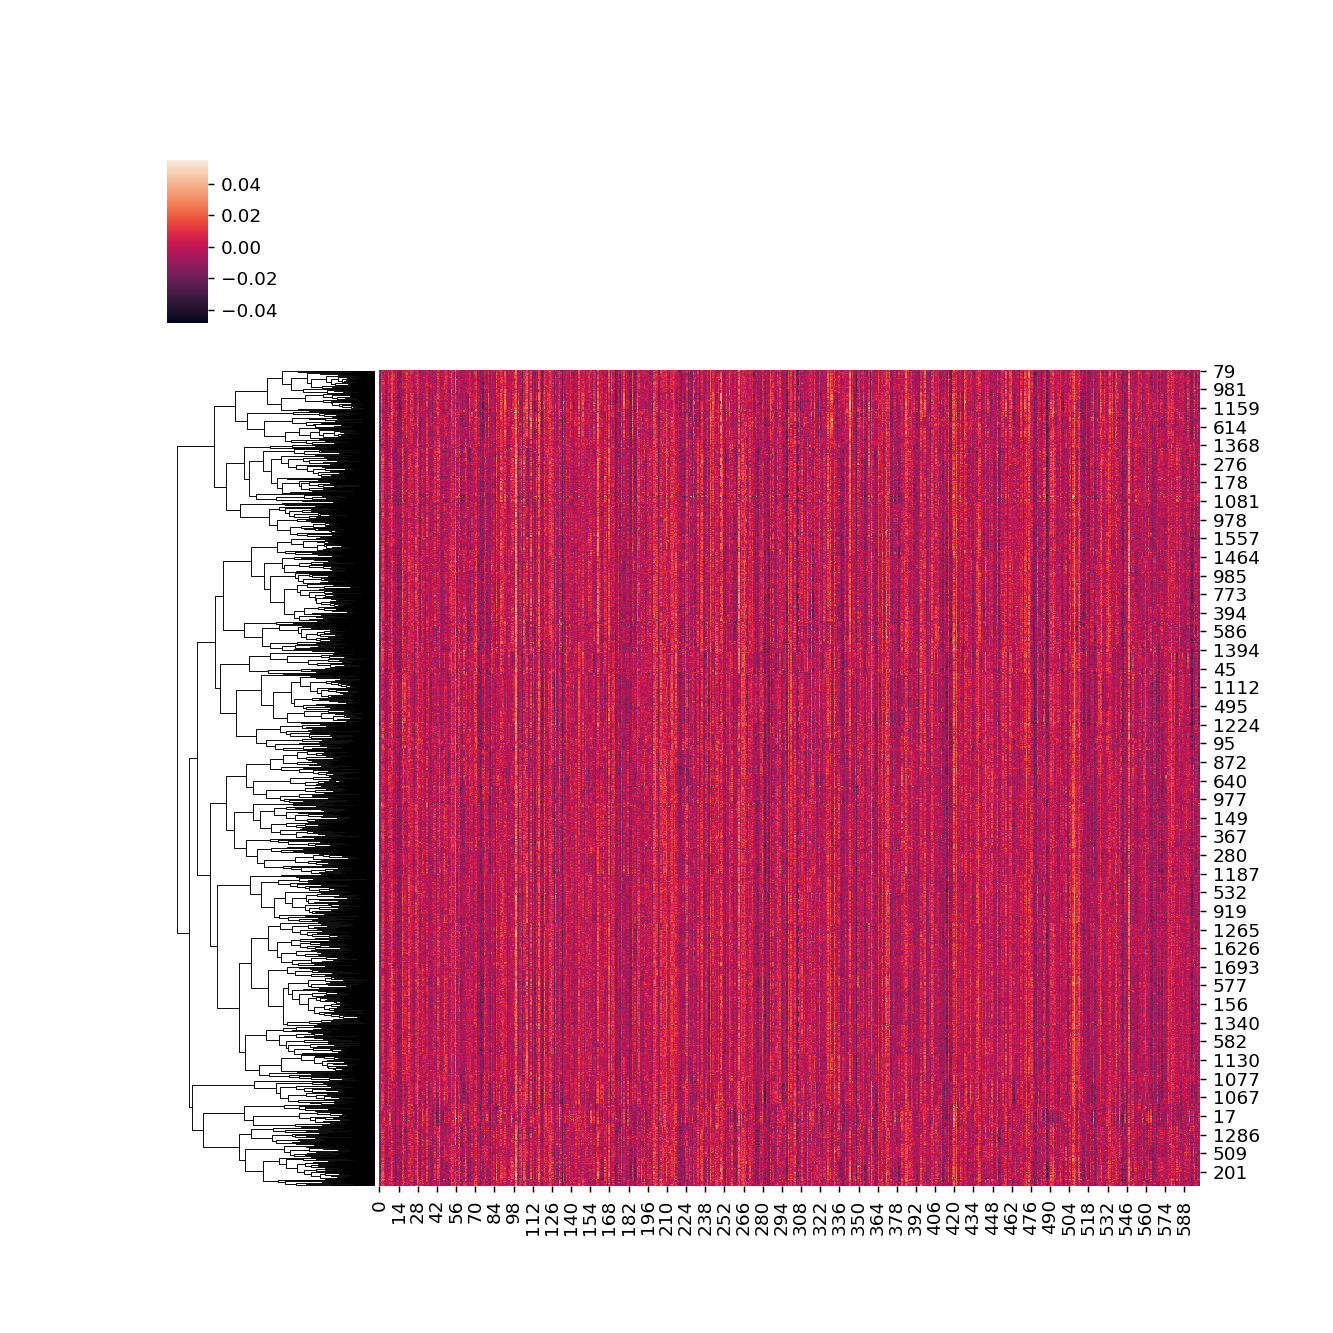

In [201]:
import seaborn as sns
_=sns.clustermap(w2v_vectors, metric="cosine", method="complete", col_cluster=False)

Но давайте взглянем какие новости объединились для каждого из кластеров.

In [41]:
clusters=list(set(db_clusters))

for c in clusters:
    print(c)
    cntr=0
    for i, a in enumerate(lentaPos.articles):
        if db_clusters[i]==c:
            print(a.split("-----")[0])
            cntr+=1
            if cntr==3:
                break

0
Раскрыто происхождение новейшей украинской крылатой ракеты

Названа причина исчезновения рыболовецкого судна «Восток»

С космодрома Восточный запустили третью ракету

1
Русских гопников назвали настоящими древними славянами

Защитники животных предложили сделать черепашек-ниндзя веганами

Ушастый лисенок из России стал мировой знаменитостью

2
Поезд с американскими политиками врезался в мусоровоз

Звезду сериала «Детективы» задержали за работу детектива

Учитель угодил под суд за оральный секс со спящим школьником

3
Открыт первый европейский бордель с секс-куклами вместо проституток

Защитников отечества защитят от некачественной выпивки

Россиянин заплатил налог с комиссией в 2500 процентов

4
Социологи подсчитали планирующих проголосовать на выборах-2018

Украинский депутат призвал к убийствам «непатриотов»

Британский лорд опоздал на заседание и уволился со стыда

5
Ближний Восток становится центром роскоши

Telegram пропал из AppStore

Любителей порно признали самыми удобными же

А вот что выдается по k средних.

In [202]:
clusters=list(set(km_clusters))

for c in clusters:
    print(c)
    cntr=0
    for i, a in enumerate(lentaPos.articles):
        if km_clusters[i]==c:
            print(a.split("-----")[0])
            cntr+=1
            if cntr==3:
                break

0
Открыт первый европейский бордель с секс-куклами вместо проституток

Звезду сериала «Детективы» задержали за работу детектива

Работников скорой помощи заставили строить дачу начальнику

1
Украинский депутат призвал к убийствам «непатриотов»

Боевым священникам-десантникам доверят рулить бронетехникой

Рассказавшего о скупающих черную икру украинцах политолога назвали порохоботом

2
С космодрома Восточный запустили третью ракету

США рассекретили российское космическое оружие

В Поморье ученые раскрыли секрет красного снега

3
Ворующий трусы кот рассорил влюбленную пару

Трое датчан застряли на крыше машины в кишащей крокодилами реке

Пожирание поссума питоном попало на видео

4
Неймар заставит «Барселону» расплатиться

Объявлены стартовые пятерки на Матч звезд Единой лиги ВТБ

Запасной нападающий «Зенита» пожаловался на заработанные ни за что деньги

5
Хвалившийся Ferrari подросток-миллионер «по воле Аллаха» займется пошивом одежды

Pornhub захотел одарить полицейских сотнями литров

А теперь давайте посмотрим что выдают методы на оригинальных данных, но при отображении кластеризации на плоскоcть. Кластеризовать будем по исходным данным, а цветовую схему накладывать на результаты уменьшения размерности пространства.

<IPython.core.display.Javascript object>


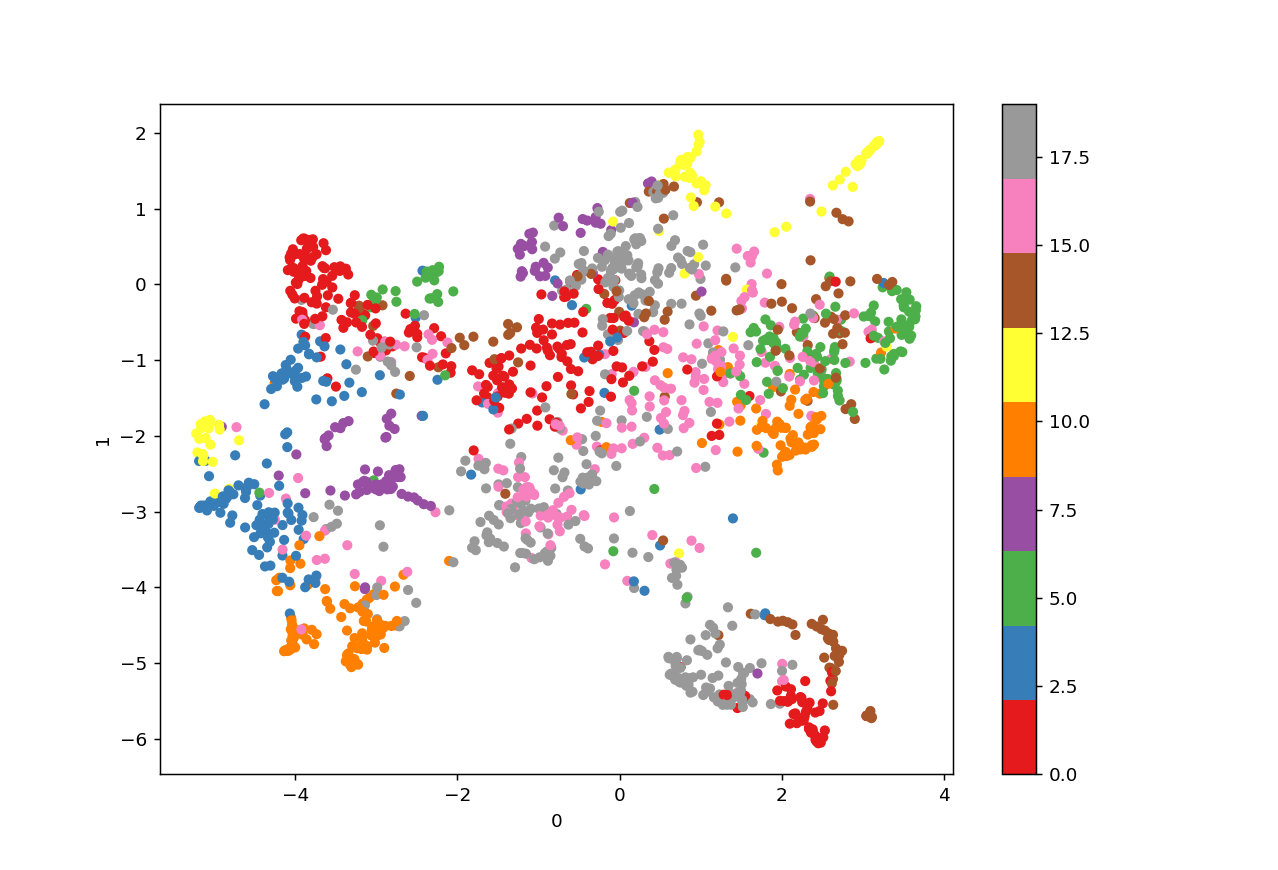

In [57]:
# Это спектральная кластеризация.
sc=SpectralClustering(n_clusters=20)
sc_clusters=sc.fit_predict(w2v_vectors)
ax=pd.DataFrame(umaped_v).plot.scatter(x=0, y=1, c=sc_clusters, cmap=plt.cm.Set1)

А теперь попробуем DBSCAN. <br>
Если для плоскости мы могли визуально оценить какое можно назначить расстояние между объектами для объединения в кластер, то для многомерного пространства не ясно что делать, так как не понятно какие тамм расстояния. <br>
Для оценки этого параметра построим график среднего расстояния до 20 ближайших точек.

In [66]:
from tqdm import tqdm

In [129]:
neighbours=[]
for v1 in tqdm(w2v_vectors):
    neighbours.append(np.mean(sorted([np.linalg.norm(v1-v2) for v2 in w2v_vectors])[1:4]))

100%|██████████| 1708/1708 [00:16<00:00, 105.21it/s]


<IPython.core.display.Javascript object>


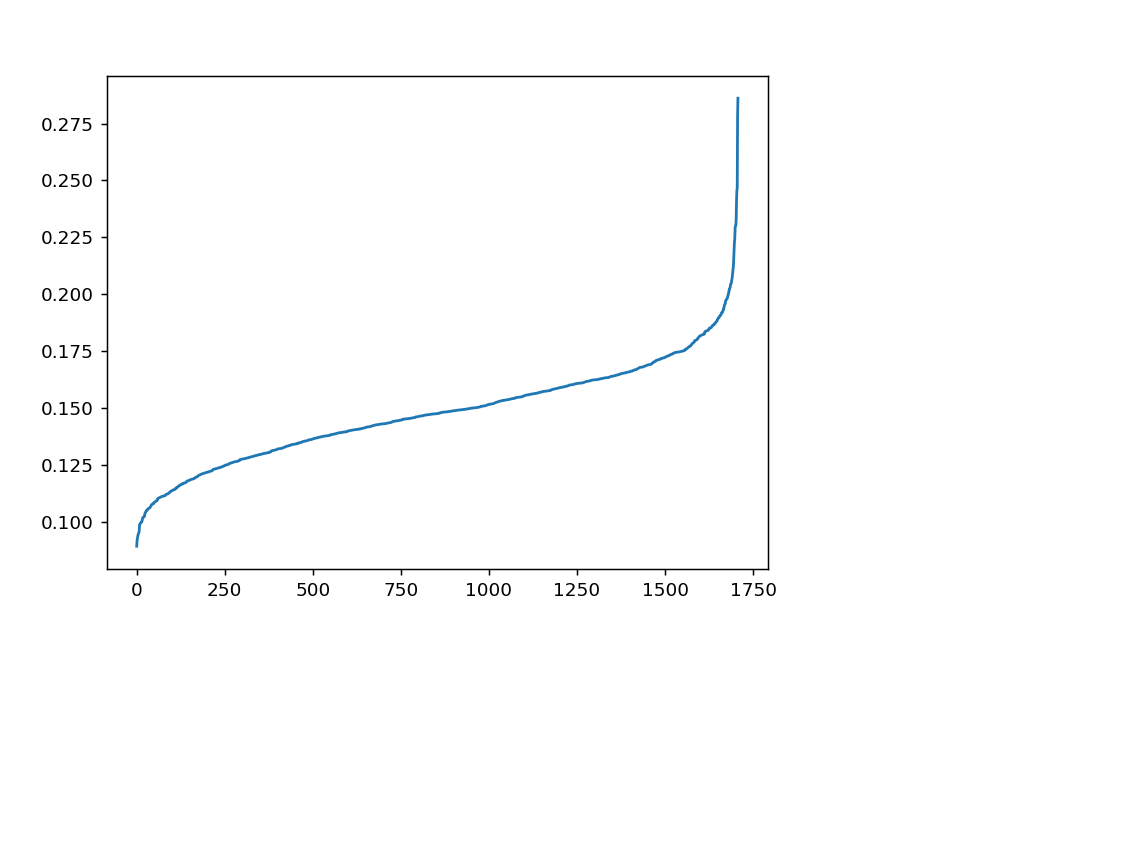

In [130]:
neighbours=sorted(neighbours)
fig, ax = plt.subplots()
ax.plot(range(len(neighbours)), neighbours)
plt.show()

In [190]:
# А теперь попробуем DBSCAN.
db=DBSCAN(eps=0.14, min_samples=3)
db_clusters=db.fit_predict(w2v_vectors)


<IPython.core.display.Javascript object>


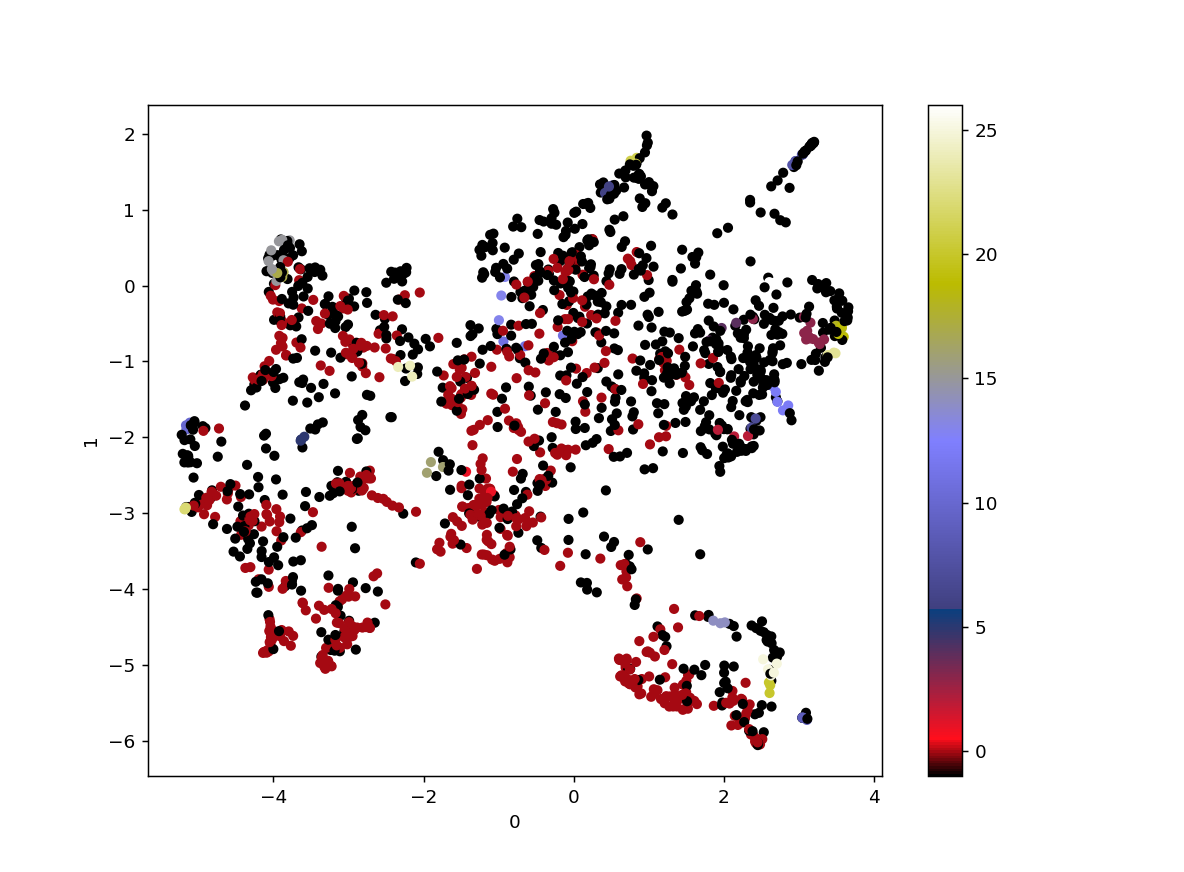

In [191]:
ax=pd.DataFrame(umaped_v).plot.scatter(x=0, y=1, c=db_clusters, cmap=plt.cm.gist_stern)

In [139]:
umap_news3d=umap.UMAP(n_components=3)
w2v_vectors3d=np.array([text_to_vec(dct, model_w2v, 600) for dct in lentaPos.dictionaries])

umaped_v3d=umap_news3d.fit_transform(w2v_vectors3d)


In [181]:
db=DBSCAN(eps=0.14, min_samples=3)
db_clusters3d=db.fit_predict(w2v_vectors)

<IPython.core.display.Javascript object>


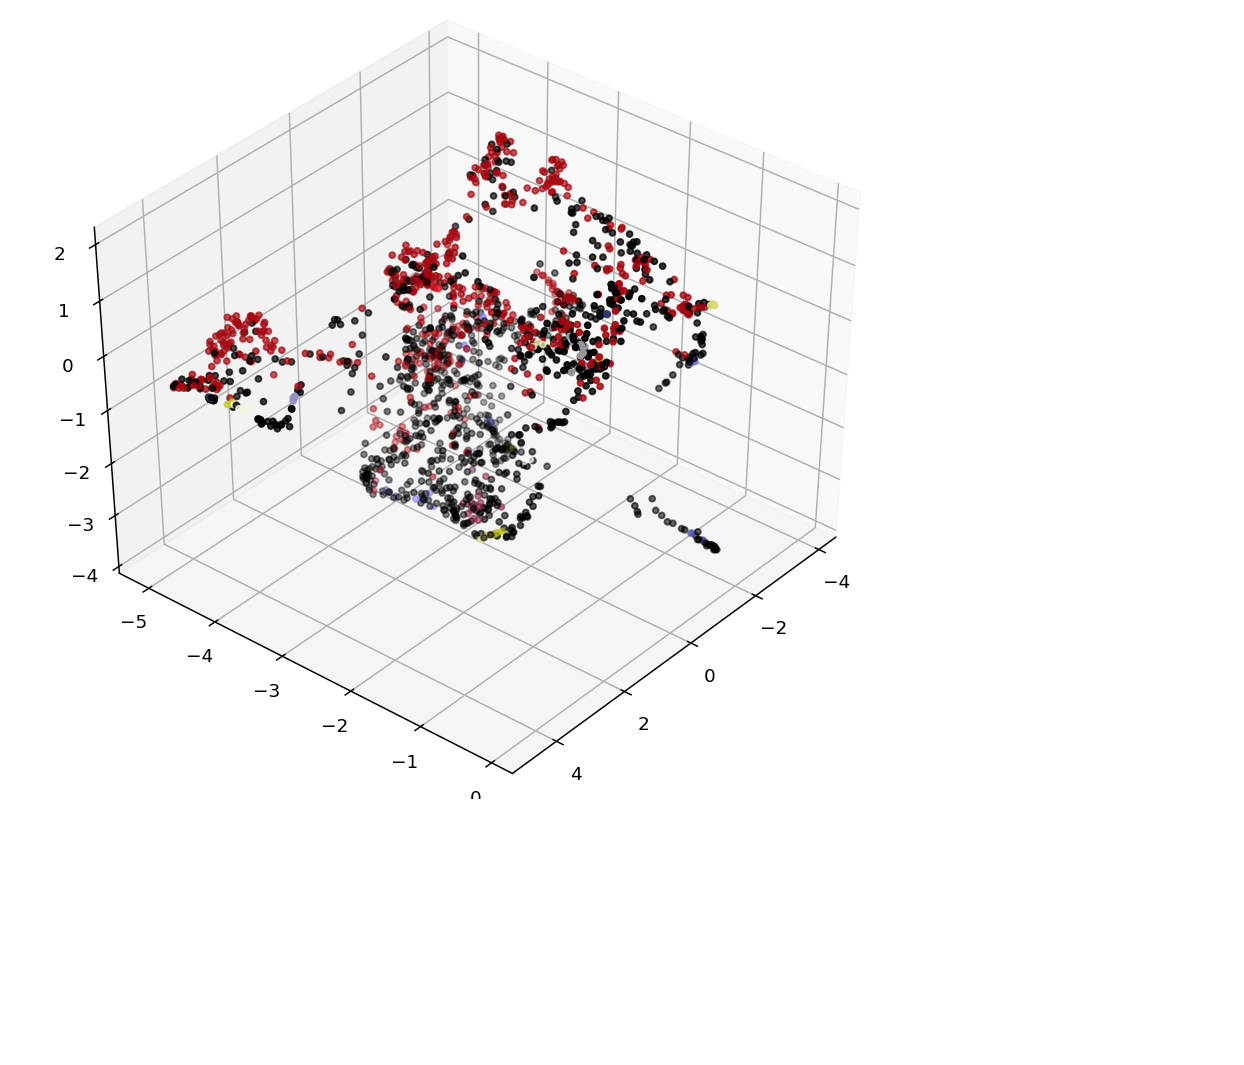

In [189]:
fig = plt.figure(101, figsize=(7, 6))
ax = Axes3D(fig, elev=40, azim=40)
ax.scatter(umaped_v3d[:, 0], umaped_v3d[:, 1], umaped_v3d[:, 2], c=db_clusters3d,
            cmap=plt.cm.gist_stern, s=10)

plt.show()

In [183]:
pca_news3d=PCA(n_components=3)
#w2v_vectors3d2=np.array([text_to_vec(dct, model_w2v, 600) for dct in lentaPos.dictionaries])

pcaed_v3d=pca_news3d.fit_transform(w2v_vectors3d)


<IPython.core.display.Javascript object>


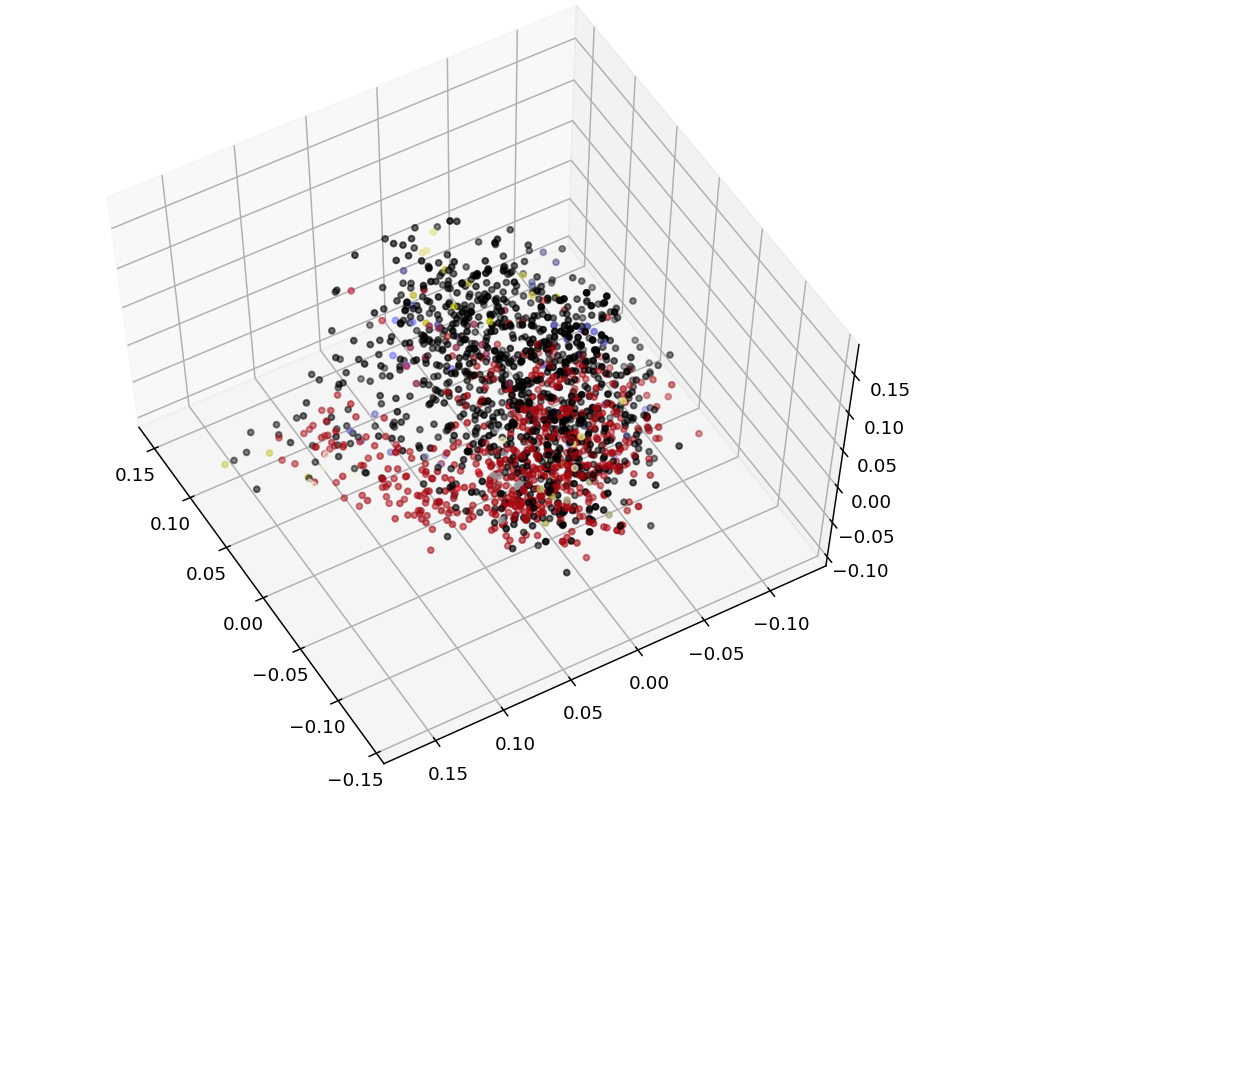

In [187]:
fig = plt.figure(110, figsize=(7, 6))
ax = Axes3D(fig, elev=60, azim=150)
ax.scatter(pcaed_v3d[:, 0], pcaed_v3d[:, 1], pcaed_v3d[:, 2], c=db_clusters3d,
            cmap=plt.cm.gist_stern, s=10)

plt.show()

In [167]:
clusters=list(set(db_clusters3d))

for c in clusters:
    print(c)
    cntr=0
    for i, a in enumerate(lentaPos.articles):
        if db_clusters[i]==c:
            print(a.split("-----")[0])
            cntr+=1
            if cntr==3:
                break

0
Раскрыто происхождение новейшей украинской крылатой ракеты

Русских гопников назвали настоящими древними славянами

Социологи подсчитали планирующих проголосовать на выборах-2018

1
Неймар заставит «Барселону» расплатиться

Запасной нападающий «Зенита» пожаловался на заработанные ни за что деньги

Роналду вошел в положение «Реала» и заслужил повышение зарплаты

2
Любителей порно признали самыми удобными жертвами

В секс-игрушках нашли новую опасность

Посетителей порносайтов предупредили о новой опасности

3
В сети появились новые фото Крымского моста

Началось сооружение железнодорожных пролетов Крымского моста

Мост в Крым строит многотысячная команда

4
Енотиха заставила спасателей два часа вызволять ее из вентиляции

Сидевшего в ловушке два года китайского кота освободили

Британцы спасли лысых ежиков

5
Назван простой способ сбросить вес

Доказана польза алкоголя

Развеян миф об опасности телефонов

6
Ученые побороли неизлечимый рак

Создана универсальная вакцина от рака

Найден

Еще на свете существует нечеткая кластеризация. Она позволяет приписать каждому объекту не отдельный класс, а вектор вероятностей принадлежности объекта каждому из классов. К данной группе относятся такие методы, как <a href="https://en.wikipedia.org/wiki/Fuzzy_clustering">c-средних</a>, <a href="https://en.wikipedia.org/wiki/FLAME_clustering">FLAME</a> и некоторые другие.  Но их нет в стандартных библиотеках на Питоне, поэтому мы не будем их рассматривать.